# Manuscript plots: stationary results

## Alexandra C Semposki

### Date: 18 February 2025

In [1]:
# import packages
%load_ext autoreload
%autoreload 2

import corner
import sys
sys.path.append('../src/')
import scipy as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from sklearn.gaussian_process.kernels import RBF, Matern, ConstantKernel as C, WhiteKernel
from sklearn.gaussian_process import GaussianProcessRegressor
from scripts import *

import sys
sys.path.append('../../../TOV_Solver')
from TOV_class import TOVsolver

# set params for plotting
setup_rc_params()

# define saturation up here
n0 = 0.164

# color plotting assistance
orders = [0, 1, 2, 3]
order_labels = [r'$\chi$EFT (N$^{3}$LO)', r'pQCD (N$^{2}$LO)', 'Mixed Model']
color_list = ['Reds', 'Blues','Purples', 'Oranges', 'Greens', 'Greys']
cmaps = [plt.get_cmap(name) for name in color_list[:len(orders)]]
colors = [cmap(0.7 - 0.1 * (i == 0)) for i, cmap in enumerate(cmaps)]
light_colors = [lighten_color(color, 0.5) for color in colors]
dark_colors = [lighten_color(color, 1.5) for color in colors]

In [2]:
# load NICER data
miller = np.loadtxt('../data/NICER_data/NICER+XMM_J0740_RM.txt')
miller_0030_2 = np.loadtxt('../data/NICER_data/J0030_2spot_RM.txt')
miller_0030_3 = np.loadtxt('../data/NICER_data/J0030_3spot_RM.txt')

# load NICER J0437 data
j0437 = np.loadtxt('../data/NICER_data/J0437_data/samples/J0437_3C50_BKG_AGN_hiMN_lowXPSI_wmrsamples.dat')

# load in the LIGO data from the folder
df_insens = pd.read_csv('../data/LIGO_data/EoS-insensitive_posterior_samples.dat', sep='\s+')
df_maxmass = pd.read_csv('../data/LIGO_data/Parametrized-EoS_maxmass_posterior_samples.dat', sep='\s+')

# convert to a dict
LIGO_insens = df_insens.to_dict('list')
LIGO_maxmass = df_maxmass.to_dict('list')

# LIGO data
x11 = np.asarray(LIGO_maxmass['Radius1_km'])
y11 = np.asarray(LIGO_maxmass['m1_source_frame_Msun'])
x22 = np.asarray(LIGO_maxmass['Radius2_km'])
y22 = np.asarray(LIGO_maxmass['m2_source_frame_Msun'])

In [3]:
# data imports
pressure_20 = np.load('../data/NSM_data/gp_pressure_20_NSM.npz')
pressure_40 = np.load('../data/NSM_data/gp_pressure_40_NSM.npz')
pqcd_20 = np.load('../data/NSM_data/pressure_pqcd_cut_20_NSM.npz')
pqcd_40 = np.load('../data/NSM_data/pressure_pqcd_cut_40_NSM.npz')
xeft = np.load('../data/NSM_data/chiral_nsm_n3lo.npz')
cs2_20 = np.load('../data/Paper_data/cs2_data_20n0_stationary.npz')
cs2_40 = np.load('../data/Paper_data/cs2_data_40n0_stationary.npz')

## Stationary GP M-R curves

In [ ]:
# compare 20n0 and 40n0 or compare spline vs. no spline (mean functions)
tov = TOVsolver(eos_filepath='../data/Paper_data/20n0_stationary_env.npz', tidal=False, moment=False)
tov2 = TOVsolver(eos_filepath='../data/Paper_data/40n0_stationary_env.npz', tidal=False, moment=False)

In [ ]:
rad20, _, mass20 = tov.tov_routine(verbose=False, write_to_file=False)
rad40, _, mass40 = tov2.tov_routine(verbose=False, write_to_file=False)

In [ ]:
# get max mass arrays from each
max_rad20, _, max_mass20 = tov.max_arrays()
max_rad40, _, max_mass40 = tov2.max_arrays()

# get central densities of each envelope
cdens20 = tov.central_dens()
cdens40 = tov2.central_dens()

print(cdens20/n0)
print(cdens40/n0)

In [ ]:
# plot the results
import matplotlib.patches as mpatches
from matplotlib.patches import Polygon

import sys
sys.path.append('../src')
from scripts import *
setup_rc_params()

# plot the results including the samples and the overall mean, std_dev
fig = plt.figure(figsize=(6,6), dpi=600)
ax = plt.axes()

# 20n0
vertices = [(x, y1_val) for x, y1_val in zip(rad20[:,1], mass20[:,1])] + \
           [(x, y2_val) for x, y2_val in zip(reversed(rad20[:,2]), reversed(mass20[:,2]))]
vertices2 = [(x, y1_val) for x, y1_val in zip(rad20[:,0], mass20[:,0])] + \
           [(x, y2_val) for x, y2_val in zip(reversed(rad20[:,1]), reversed(mass20[:,1]))]

# 40n0
vertices40 = [(x, y1_val) for x, y1_val in zip(rad40[:,1], mass40[:,1])] + \
           [(x, y2_val) for x, y2_val in zip(reversed(rad40[:,2]), reversed(mass40[:,2]))]
vertices402 = [(x, y1_val) for x, y1_val in zip(rad40[:,0], mass40[:,0])] + \
           [(x, y2_val) for x, y2_val in zip(reversed(rad40[:,1]), reversed(mass40[:,1]))]

polygon = Polygon(vertices, closed=True, color="cornflowerblue", alpha=0.25, zorder=-10)
polygon2 = Polygon(vertices2, closed=True, color="cornflowerblue", alpha=0.25, zorder=-10)
plt.gca().add_patch(polygon)
plt.gca().add_patch(polygon2)

# means
ax.plot(rad20[:,1], mass20[:,1], color='cornflowerblue', label=r'$20n_{0}$', zorder=-9)

polygon40 = Polygon(vertices40, closed=True, color="darkorange", alpha=0.25, zorder=-5)
polygon402 = Polygon(vertices402, closed=True, color="darkorange", alpha=0.25, zorder=-5)
plt.gca().add_patch(polygon40)
plt.gca().add_patch(polygon402)

# means
ax.plot(rad40[:,1], mass40[:,1], color='darkorange', label=r'$40n_{0}$', zorder=-4)

#handles, labels = plt.gca().get_legend_handles_labels()

# remove duplicates by converting to a dictionary
#unique = dict(zip(labels, handles))
#legend = ax.legend(unique.values(), unique.keys(), fontsize=15, frameon=False, bbox_to_anchor=[0.15, 0.975])

legend_entries = [
    (('cornflowerblue','cornflowerblue'), "$20n_{0}$"),
    (('darkorange','darkorange'), "$40n_{0}$"),
]

# linestyle choices for the contours (whoa)
contour_lines = {'linestyles':'dashed'}

# NICER and LIGO contours
corner.hist2d(miller[:,0], miller[:,1], bins=25, range=None, axes_scale=['linear', 'linear'], weights=None, \
              levels=[0.9], smooth=0.8, ax=ax, color='darkgreen', quiet=False, plot_datapoints=False, \
              plot_density=False, plot_contours=True, no_fill_contours=True, fill_contours=False, \
              contour_kwargs=None, contourf_kwargs=None, data_kwargs=None, pcolor_kwargs=None, \
              new_fig=False)
corner.hist2d(miller_0030_2[:,0], miller_0030_2[:,1], bins=25, range=None, axes_scale=['linear', 'linear'], weights=None, \
              levels=[0.9], smooth=0.8, ax=ax, color='royalblue', quiet=False, plot_datapoints=False, \
              plot_density=False, plot_contours=True, no_fill_contours=True, fill_contours=False, \
              contour_kwargs=None, contourf_kwargs=None, data_kwargs=None, pcolor_kwargs=None, \
              new_fig=False)
corner.hist2d(x11, y11, bins=30, range=None, axes_scale=['linear', 'linear'], weights=None, \
              levels=[0.9], smooth=1.1, ax=ax, color='maroon', quiet=False, plot_datapoints=False, \
              plot_density=False, plot_contours=True, no_fill_contours=True, fill_contours=False, \
              contour_kwargs=None, contourf_kwargs=None, data_kwargs=None, pcolor_kwargs=None, \
              new_fig=False)
corner.hist2d(x22, y22, bins=25, range=None, axes_scale=['linear', 'linear'], weights=None, \
              levels=[0.9], smooth=0.9, ax=ax, color='maroon', quiet=False, plot_datapoints=False, \
              plot_density=False, plot_contours=True, no_fill_contours=True, fill_contours=False, \
              contour_kwargs=None, contourf_kwargs=None, data_kwargs=None, pcolor_kwargs=None, \
              new_fig=False)
corner.hist2d(j0437[:,2], j0437[:,1], bins=25, range=None, axes_scale=['linear', 'linear'], weights=j0437[:,0], \
              levels=[0.9], smooth=0.8, ax=ax, color='purple', quiet=False, plot_datapoints=False, \
              plot_density=False, plot_contours=True, no_fill_contours=True, fill_contours=False, \
              contour_kwargs=None, contourf_kwargs=None, data_kwargs=None, pcolor_kwargs=None, \
              new_fig=False)
    
# labels for LIGO and NICER data
ax.text(13.5, 2.15, r'$\textbf{J0740+6620}$', zorder=100, ha='center', va='top', fontsize=14)
ax.text(14.5, 1.65, r'$\textbf{J0030+0451}$', zorder=100, ha='center', va='top', fontsize=14)

# # GW 190814
# fake_linspace = np.linspace(5.5, 17.0, 100)
# gw_lower = 2.51*np.ones(len(fake_linspace))
# gw_upper = 2.67*np.ones(len(fake_linspace))
# ax.fill_between(fake_linspace, gw_lower, gw_upper, alpha=0.25, color='grey', hatch='/')
# ax.axhline(y=2.51, color='lightgrey')
# ax.axhline(y=2.67, color='lightgrey')
# ax.text(11.5, 2.635, r'$\textbf{GW190814}$', ha='center', va='top', fontsize=16)
ax.text(12.0, 1.3, r'$\textbf{GW170817}$', ha='center', va='top', color='black', fontsize=14, zorder=10)
#ax.axvline(x=11.0, ymin=0.4, ymax=0.55, color='purple', alpha=0.5, linestyle='dashed')
ax.text(11.75, 1.46, r'$\textbf{J0437-4715}$', ha='center', va='top', fontsize=13)

# adding labels for central densities of the top 2 curves
ax.text(8.0, 1.36, r'{:.2f}$n_0$'.format(cdens40[1]/n0), rotation=28, va='center', \
        ha='center', fontsize=14)
ax.text(9.82, 1.78, r'{:.2f}$n_0$'.format(cdens40[2]/n0), rotation=47, va='center', \
        ha='center', fontsize=14)

ax.text(8.8, 1.6, r'{:.2f}$n_0$'.format(cdens20[1]/n0), rotation=35, va='center', \
        ha='center', fontsize=14)
ax.text(11.0, 2.1, r'{:.2f}$n_0$'.format(cdens20[2]/n0), rotation=45, va='center', \
        ha='center', fontsize=14)

# causality limit
# radlim = np.linspace(5.0, 20.0, 100)
# ax.plot(radlim, 0.354*radlim, color='grey')
# ax.fill_between(radlim, 0.354*radlim, 3.0, color='lightgrey', alpha=0.5)
# ax.text(6.15, 2.25, r'Causality', rotation=57, va='center', \
#         ha='center', fontsize=14)

ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_minor_locator(MultipleLocator(0.125))
ax.tick_params(axis='both', which='major', labelsize=16, right=True, top=True, length=8)
ax.tick_params(axis='both', which='minor', labelsize=16, right=True, top=True, length=5)
ax.set_xlim(5.5, 17.0)
ax.set_ylim(0.0,2.5)
ax.set_xlabel(r'Radius [km]', fontsize=18)
ax.text(6.25, 0.30, r'Mass $M(R)$ $[M_\odot]$', fontsize=18, bbox=dict(facecolor='w', boxstyle='round'))
add_uncertainty_legend(fig, ax, legend_entries, fontsize=15, loc='upper left', alpha=0.25)
fig.savefig('../figures/ANM_Figures/mr_stationary_comparison_20_40.pdf')
plt.show()

## Scaled pressure and speed of sound squared

This will be a two panel plot.

In [ ]:
# set up the plot requirements
fig, ax = plt.subplots(1, 2, figsize=(16,6), dpi=600, sharex='col')

# first panel (pressure)
ax[0].set_xlim(0.5, 100.0)
ax[0].set_ylim(0.0,1.5)
ax[0].tick_params(axis='x', which='major', labelsize=20, right=True, pad=8, length=8)
ax[0].tick_params(axis='x', which='minor', labelsize=20, right=True, pad=8, length=5)
ax[0].tick_params(axis='y', which='major', labelsize=20, right=True, length=8)
ax[0].tick_params(axis='y', which='minor', labelsize=20, right=True, length=5)
ax[0].xaxis.set_major_locator(MultipleLocator(10))
ax[0].yaxis.set_minor_locator(MultipleLocator(0.1))
ax[0].text(
    80.0,1.4, r'$P(n)/P_{FG}(n) \pm 1\sigma$', ha='right', va='top',
    multialignment='center', zorder=10, fontsize=24,
    bbox=dict(facecolor='w', boxstyle='round')
)
ax[0].text(0.75, 1.45, r'(a)', ha='right', va='top', fontsize=20)
ax[0].set_xlabel(r'Scaled density $n_B/n_{0}$', fontsize=22)
ax[0].set_xscale('log')

ax[1].set_xlim(0.5, 100.)
ax[1].set_ylim(0.0,0.6)
ax[1].xaxis.set_major_locator(MultipleLocator(10))
ax[1].yaxis.set_minor_locator(MultipleLocator(0.05))
ax[1].tick_params(axis='y', which='major', labelsize=20, labelleft=False, labelright=True, \
                  right=True, length=8)
ax[1].tick_params(axis='y', which='minor', labelsize=20, labelleft=False, labelright=True, \
                  right=True, length=5)
ax[1].tick_params(axis='x', which='major', labelsize=20, labelleft=False, labelright=True, \
                  right=True, pad=8, length=8)
ax[1].tick_params(axis='x', which='minor', labelsize=20, labelleft=False, labelright=True, \
                  right=True, pad=8, length=5)
ax[1].text(0.75, 0.58, r'(b)', ha='right', va='top', fontsize=20)
ax[1].set_xlabel(r'Scaled density $n_B/n_{0}$', fontsize=22)
ax[1].set_xscale('log')

# pressure data
ax[0].plot(pressure_20['dens']/n0, pressure_20['mean'], color='cornflowerblue')
ax[0].fill_between(pressure_20['dens']/n0, pressure_20['mean']-pressure_20['std'], \
                   pressure_20['mean']+pressure_20['std'], color='cornflowerblue', alpha=0.3)

ax[0].plot(pressure_40['dens']/n0, pressure_40['mean'], color='darkorange')
ax[0].fill_between(pressure_40['dens']/n0, pressure_40['mean']-pressure_40['std'], \
                   pressure_40['mean']+pressure_40['std'], color='darkorange', alpha=0.3)

ax[0].plot(pqcd_20['dens']/n0, pqcd_20['mean'], color='blue', label=r'pQCD (N$^2$LO) ($20n_0$)')
ax[0].fill_between(pqcd_20['dens']/n0, pqcd_20['mean']-pqcd_20['std'], pqcd_20['mean']+pqcd_20['std'], \
                 alpha=0.2, color='blue')
ax[0].plot(pqcd_40['dens']/n0, pqcd_40['mean'], color='purple', label=r'pQCD (N$^2$LO) ($40n_0$)')
ax[0].fill_between(pqcd_40['dens']/n0, pqcd_40['mean']-pqcd_40['std'], pqcd_40['mean']+pqcd_40['std'], \
                 alpha=0.2, color='purple')

ax[0].plot(xeft['density']/n0, xeft['mean'], color='red', zorder=10)
ax[0].fill_between(xeft['density']/n0, xeft['mean']-xeft['std_dev'], xeft['mean']+xeft['std_dev'], \
                   color='red', alpha=0.2, zorder=10)

ax[0].text(60.0, 0.85, r'''pQCD
(N$^2$LO)''', va='center', ha='center', fontsize=20)
ax[0].text(1.0, 0.30, r'''$\chi$EFT
(N$^3$LO)''', va='center', ha='center', fontsize=20)
ax[0].text(2.5, 0.8, r'''Mixed model 
($20n_0$)''', va='center', ha='center', fontsize=20)
ax[0].text(12.5, 0.35, r'''Mixed model 
($40n_0$)''', va='center', ha='center', fontsize=20)

# speed of sound data
cs2_chiral = np.load('../data/NSM_data/cs2_chiral_NSM.npz')
cs2_pqcd = np.load('../data/eos_data/pqcd_cs2_NSM.npz')   # only have one of the two (40, need 20)

# speed of sound plotting
ax[1].plot(cs2_20['dens']/n0, cs2_20['mean'], color='cornflowerblue')
ax[1].fill_between(cs2_20['dens']/n0, cs2_20['mean']-cs2_20['std'], \
                 cs2_20['mean']+cs2_20['std'], color='cornflowerblue', alpha=0.3)

ax[1].plot(cs2_40['dens']/n0, cs2_40['mean'], color='darkorange')
ax[1].fill_between(cs2_40['dens']/n0, cs2_40['mean']-cs2_40['std'], \
                 cs2_40['mean']+cs2_40['std'], color='darkorange', alpha=0.3)

ax[1].plot(cs2_pqcd['density']/n0, cs2_pqcd['mean'], color=colors[1], linewidth=2, \
         zorder=10)
ax[1].fill_between(cs2_pqcd['density']/n0, cs2_pqcd['lower'], cs2_pqcd['upper'], \
                 facecolor=colors[1], edgecolor=colors[1], alpha=0.7, zorder=10)

ax[1].plot(cs2_chiral['density']/n0, cs2_chiral['mean'], color='red', zorder=10)
ax[1].fill_between(cs2_chiral['density']/n0, cs2_chiral['mean']-cs2_chiral['std'], \
                 cs2_chiral['mean']+cs2_chiral['std'], alpha=0.2, \
                color='red', zorder=10)

ax[1].text(35.0, 0.54, r'$c_{s}^{2}(n)$ $\pm 1\sigma$', va='center', ha='center', \
         fontsize=24, bbox=dict(facecolor='w', boxstyle='round'))
ax[1].text(70.0, 0.265, r'''pQCD
(N$^2$LO)''', va='center', ha='center', fontsize=20)
ax[1].text(1.0, 0.175, r'''$\chi$EFT
(N$^3$LO)''', va='center', ha='center', fontsize=20)
ax[1].text(2.5, 0.46, r'''Mixed model 
($20n_0$)''', va='center', ha='center', fontsize=20)
ax[1].text(12.5, 0.2, r'''Mixed model 
($40n_0$)''', va='center', ha='center', fontsize=20)

# speed of sound conformal limit 
ax[1].axhline(y=(1.0/3.0), color='grey', linestyle='dashed')  # conformal limit

# causality line
dens_cs2 = np.linspace(0.0, 16.4, 100)
fig.savefig('../figures/ANM_Figures/pressure_cs2_stationary_20_40.pdf', bbox_inches='tight')
plt.show()

---
---

## Pressure and speed of sound squared: non-stationary kernel

In [ ]:
# data imports
pres_0 = np.load('pres_cs2_0_spline_20n0.npz')
pres_1 = np.load('pres_cs2_1_spline_20n0.npz')
pres_2 = np.load('pres_cs2_2_spline_20n0.npz')
pres_3 = np.load('pres_cs2_3_spline_20n0.npz')

# no mean function
pres_00 = np.load('pres_cs2_0_zero_20n0.npz')
pres_10 = np.load('pres_cs2_1_zero_20n0.npz')
pres_20 = np.load('pres_cs2_2_zero_20n0.npz')
pres_30 = np.load('pres_cs2_3_zero_20n0.npz')

# import changepoint information
cp_0 = np.load('../data/Paper_data/info_pres_20n0_True_0.npz')
cp_1 = np.load('../data/Paper_data/info_pres_20n0_True_1.npz')
cp_2 = np.load('../data/Paper_data/info_pres_20n0_True_2.npz')
cp_3 = np.load('../data/Paper_data/info_pres_20n0_True_3.npz')
cp_00 = np.load('../data/Paper_data/info_pres_20n0_False_0.npz')
cp_10 = np.load('../data/Paper_data/info_pres_20n0_False_1.npz')
cp_20 = np.load('../data/Paper_data/info_pres_20n0_False_2.npz')
cp_30 = np.load('../data/Paper_data/info_pres_20n0_False_3.npz')

# training points for pressure
points = np.load('points_pres_spline_20n0.npz')
points2 = np.load('points_pres_zero_20n0.npz')

# set color cycle
colors = ['cornflowerblue', 'darkorange', 'mediumpurple', 'forestgreen']

# set up the plot requirements
fig, ax = plt.subplots(2, 2, figsize=(16,12), dpi=600, sharex='col')

# first panel (pressure)
for i in range(2):
    
    ax[i,0].set_xlim(0.5, 100.0)
    ax[i,0].set_ylim(0.0,1.5)
    ax[i,0].tick_params(axis='x', which='major', labelsize=20, right=True, pad=8, length=8)
    ax[i,0].tick_params(axis='x', which='minor', labelsize=20, right=True, pad=8, length=5)
    ax[i,0].tick_params(axis='y', which='major', labelsize=20, right=True, length=8)
    ax[i,0].tick_params(axis='y', which='minor', labelsize=20, right=True, length=5)
    ax[i,0].xaxis.set_major_locator(MultipleLocator(10))
    ax[i,0].yaxis.set_minor_locator(MultipleLocator(0.1))
    ax[i,0].text(
        80.0,1.4, r'$P(n)/P_{FG}(n) \pm 1\sigma$', ha='right', va='top',
        multialignment='center', zorder=10, fontsize=24,
        bbox=dict(facecolor='w', boxstyle='round')
    )
    ax[i,0].set_xscale('log')
    
for i in range(2):
    ax[i,1].set_xlim(0.5, 100.)
    ax[i,1].set_ylim(0.0,1.0)
    ax[i,1].xaxis.set_major_locator(MultipleLocator(10))
    ax[i,1].yaxis.set_minor_locator(MultipleLocator(0.05))
    ax[i,1].tick_params(axis='y', which='major', labelsize=20, labelleft=False, labelright=True, \
                      right=True, length=8)
    ax[i,1].tick_params(axis='y', which='minor', labelsize=20, labelleft=False, labelright=True, \
                      right=True, length=5)
    ax[i,1].tick_params(axis='x', which='major', labelsize=20, labelleft=False, labelright=True, \
                      right=True, pad=8, length=8)
    ax[i,1].tick_params(axis='x', which='minor', labelsize=20, labelleft=False, labelright=True, \
                      right=True, pad=8, length=5)
    ax[i,1].set_xscale('log')

ax[0,0].text(0.6, 1.45, r'(a) Zero mean function', ha='left', va='top', fontsize=20)
ax[1,0].set_xlabel(r'Scaled density $n_B/n_{0}$', fontsize=22)
ax[0,1].text(0.6, 0.96, r'(c) Zero mean function', ha='left', va='top', fontsize=20)
ax[1,1].set_xlabel(r'Scaled density $n_B/n_{0}$', fontsize=22)
ax[1,0].text(0.6, 1.45, r'(b) Spline mean function', ha='left', va='top', fontsize=20)
ax[1,1].text(0.6, 0.96, r'(d) Spline mean function', ha='left', va='top', fontsize=20)

# pressure data
ax[1,0].plot(pres_0['dens']/n0, pres_0['pres_mean'], color=colors[0], zorder=1)
ax[1,0].fill_between(pres_0['dens']/n0, pres_0['pres_mean']-pres_0['pres_std'], \
                   pres_0['pres_mean']+pres_0['pres_std'], color=colors[0], alpha=0.3, zorder=0)

ax[1,0].plot(pres_1['dens']/n0, pres_1['pres_mean'], color=colors[1], zorder=3)
ax[1,0].fill_between(pres_1['dens']/n0, pres_1['pres_mean']-pres_1['pres_std'], \
                   pres_1['pres_mean']+pres_1['pres_std'], color=colors[1], alpha=0.3, zorder=2)

ax[1,0].plot(pres_2['dens']/n0, pres_2['pres_mean'], color=colors[2], zorder=5)
ax[1,0].fill_between(pres_2['dens']/n0, pres_2['pres_mean']-pres_2['pres_std'], \
                   pres_2['pres_mean']+pres_2['pres_std'], color=colors[2], alpha=0.35, zorder=4)

ax[1,0].plot(pres_3['dens']/n0, pres_3['pres_mean'], color=colors[3], zorder=7)
ax[1,0].fill_between(pres_3['dens']/n0, pres_3['pres_mean']-pres_3['pres_std'], \
                   pres_3['pres_mean']+pres_3['pres_std'], color=colors[3], alpha=0.3, zorder=6)

# set up with proper colours HIC 
ax[1,0].errorbar(points['dens'][4]/n0, points['mean'][4], points['std'][4], marker='o', capsize=4, \
               linestyle=' ', elinewidth=2, zorder=10, color=colors[1], label=r'HIC constraint')

ax[1,0].errorbar(points['dens'][5]/n0, points['mean'][5], points['std'][5], marker='o', capsize=4, \
               linestyle=' ', elinewidth=2, zorder=10, color=colors[2],\
               label=r'Datum 1')

ax[1,0].errorbar(points['dens'][6]/n0, points['mean'][6], points['std'][6], marker='o', capsize=4, \
               linestyle=' ', elinewidth=2, zorder=10, color=colors[3], \
               label=r'Datum 2')

#################
for i in range(2):
    ax[i,0].plot(pqcd_20['dens']/n0, pqcd_20['mean'], color='blue', zorder=11)
    ax[i,0].fill_between(pqcd_20['dens']/n0, pqcd_20['mean']-pqcd_20['std'], pqcd_20['mean']+pqcd_20['std'], \
                     alpha=0.3, color='blue', zorder=10)
    ax[i,0].plot(pqcd_40['dens']/n0, pqcd_40['mean'], color='purple', zorder=11)
    ax[i,0].fill_between(pqcd_40['dens']/n0, pqcd_40['mean']-pqcd_40['std'], pqcd_40['mean']+pqcd_40['std'], \
                     alpha=0.3, color='purple', zorder=10)

    ax[i,0].plot(xeft['density']/n0, xeft['mean'], color='red', zorder=10)
    ax[i,0].fill_between(xeft['density']/n0, xeft['mean']-xeft['std_dev'], xeft['mean']+xeft['std_dev'], \
                       color='red', alpha=0.3, zorder=10)

    ax[i,0].text(60.0, 0.9, r'''pQCD
    (N$^2$LO)''', va='center', ha='center', fontsize=20)
    ax[i,0].text(1.0, 0.30, r'''$\chi$EFT
    (N$^3$LO)''', va='center', ha='center', fontsize=20)
    
#####################

ax[0,0].plot(pres_00['dens']/n0, pres_00['pres_mean'], color=colors[0], zorder=1)
ax[0,0].fill_between(pres_00['dens']/n0, pres_00['pres_mean']-pres_00['pres_std'], \
                   pres_00['pres_mean']+pres_00['pres_std'], color=colors[0], alpha=0.3, zorder=0)

ax[0,0].plot(pres_10['dens']/n0, pres_10['pres_mean'], color=colors[1], zorder=3)
ax[0,0].fill_between(pres_10['dens']/n0, pres_10['pres_mean']-pres_10['pres_std'], \
                   pres_10['pres_mean']+pres_10['pres_std'], color=colors[1], alpha=0.3, zorder=2)

ax[0,0].plot(pres_20['dens']/n0, pres_20['pres_mean'], color=colors[2], zorder=5)
ax[0,0].fill_between(pres_20['dens']/n0, pres_20['pres_mean']-pres_20['pres_std'], \
                   pres_20['pres_mean']+pres_20['pres_std'], color=colors[2], alpha=0.35, zorder=4)

ax[0,0].plot(pres_30['dens']/n0, pres_30['pres_mean'], color=colors[3], zorder=7)
ax[0,0].fill_between(pres_30['dens']/n0, pres_30['pres_mean']-pres_30['pres_std'], \
                   pres_30['pres_mean']+pres_30['pres_std'], color=colors[3], alpha=0.3, zorder=6)

# set up with proper colours HIC 
ax[0,0].errorbar(points2['dens'][4]/n0, points2['mean'][4], points2['std'][4], marker='o', capsize=4, \
               linestyle=' ', elinewidth=2, zorder=10, color=colors[1], label=r'HIC constraint')

ax[0,0].errorbar(points2['dens'][5]/n0, points2['mean'][5], points2['std'][5], marker='o', capsize=4, \
               linestyle=' ', elinewidth=2, zorder=10, color=colors[2],\
               label=r'Datum 1')

ax[0,0].errorbar(points2['dens'][6]/n0, points2['mean'][6], points2['std'][6], marker='o', capsize=4, \
               linestyle=' ', elinewidth=2, zorder=10, color=colors[3], \
               label=r'Datum 2')
    
#####################

# speed of sound data
cs2_chiral = np.load('../data/NSM_data/cs2_chiral_NSM.npz')
cs2_pqcd = np.load('../data/eos_data/pqcd_cs2_NSM.npz')   # only have one of the two (40, need 20)

# speed of sound plotting
ax[1,1].plot(pres_0['dens']/n0, pres_0['cs2_mean'], color=colors[0], zorder=1)
ax[1,1].fill_between(pres_0['dens']/n0, pres_0['cs2_mean']-pres_0['cs2_std'], \
                 pres_0['cs2_mean']+pres_0['cs2_std'], color=colors[0], alpha=0.3, zorder=0)

ax[1,1].plot(pres_1['dens']/n0, pres_1['cs2_mean'], color=colors[1], zorder=3)
ax[1,1].fill_between(pres_1['dens']/n0, pres_1['cs2_mean']-pres_1['cs2_std'], \
                 pres_1['cs2_mean']+pres_1['cs2_std'], color=colors[1], alpha=0.3, zorder=2)

ax[1,1].plot(pres_2['dens']/n0, pres_2['cs2_mean'], color=colors[2], zorder=5)
ax[1,1].fill_between(pres_2['dens']/n0, pres_2['cs2_mean']-pres_2['cs2_std'], \
                 pres_2['cs2_mean']+pres_2['cs2_std'], color=colors[2], alpha=0.35, zorder=4)

ax[1,1].plot(pres_3['dens']/n0, pres_3['cs2_mean'], color=colors[3], zorder=7)
ax[1,1].fill_between(pres_3['dens']/n0, pres_3['cs2_mean']-pres_3['cs2_std'], \
                 pres_3['cs2_mean']+pres_3['cs2_std'], color=colors[3], alpha=0.3, zorder=6)

#### changepoint information ####
ax[1,1].axvline(x=cp_1['cp']/n0, linestyle='dashed', alpha=0.5, linewidth=2, zorder=-100, color=colors[1], \
               label=r'$x_0 = {}~\textrm{{fm}}^{{-3}}$'.format(cp_1['cp']))
ax[1,1].axvline(x=cp_2['cp']/n0, linestyle='dashdot', alpha=0.6, linewidth=2, zorder=-100, color=colors[2], \
               label=r'$x_0 = {}~\textrm{{fm}}^{{-3}}$'.format(cp_2['cp']))
ax[1,1].axvline(x=cp_3['cp']/n0, linestyle='dashed', alpha=0.5, linewidth=2, zorder=-100, color=colors[3], \
               label=r'$x_0 = {}~\textrm{{fm}}^{{-3}}$'.format(cp_3['cp']))

cs2_chiral = np.load('../data/NSM_data/cs2_chiral_NSM.npz')
cs2_pqcd = np.load('../data/eos_data/pqcd_cs2_NSM.npz')   # only have one of the two (40, need 20)

#####################

ax[0,1].plot(pres_00['dens']/n0, pres_00['cs2_mean'], color=colors[0], zorder=1)
ax[0,1].fill_between(pres_00['dens']/n0, pres_00['cs2_mean']-pres_00['cs2_std'], \
                 pres_00['cs2_mean']+pres_00['cs2_std'], color=colors[0], alpha=0.3, zorder=0)

ax[0,1].plot(pres_10['dens']/n0, pres_10['cs2_mean'], color=colors[1], zorder=3)
ax[0,1].fill_between(pres_10['dens']/n0, pres_10['cs2_mean']-pres_10['cs2_std'], \
                 pres_10['cs2_mean']+pres_10['cs2_std'], color=colors[1], alpha=0.3, zorder=2)

ax[0,1].plot(pres_20['dens']/n0, pres_20['cs2_mean'], color=colors[2], zorder=5)
ax[0,1].fill_between(pres_20['dens']/n0, pres_20['cs2_mean']-pres_20['cs2_std'], \
                 pres_20['cs2_mean']+pres_20['cs2_std'], color=colors[2], alpha=0.35, zorder=4)

ax[0,1].plot(pres_30['dens']/n0, pres_30['cs2_mean'], color=colors[3], zorder=7)
ax[0,1].fill_between(pres_30['dens']/n0, pres_30['cs2_mean']-pres_30['cs2_std'], \
                 pres_30['cs2_mean']+pres_30['cs2_std'], color=colors[3], alpha=0.3, zorder=6)

#### changepoint information ####
ax[0,1].axvline(x=cp_10['cp']/n0, linestyle='dashed', alpha=0.5, linewidth=2, zorder=-100, color=colors[1], \
               label=r'$x_0 = {}~\textrm{{fm}}^{{-3}}$'.format(cp_10['cp']))
ax[0,1].axvline(x=cp_20['cp']/n0, linestyle='dashdot', alpha=0.6, linewidth=2, zorder=-100, color=colors[2], \
               label=r'$x_0 = {}~\textrm{{fm}}^{{-3}}$'.format(cp_20['cp']))
ax[0,1].axvline(x=cp_30['cp']/n0, linestyle='dashed', alpha=0.5, linewidth=2, zorder=-100, color=colors[3], \
               label=r'$x_0 = {}~\textrm{{fm}}^{{-3}}$'.format(cp_30['cp']))

#####################
for i in range(2):
    ax[i,1].plot(cs2_pqcd['density']/n0, cs2_pqcd['mean'], color='blue', linewidth=2, \
             zorder=10)
    ax[i,1].fill_between(cs2_pqcd['density']/n0, cs2_pqcd['lower'], cs2_pqcd['upper'], \
                     facecolor='blue', edgecolor='blue', alpha=0.7, zorder=10)

    ax[i,1].plot(cs2_chiral['density']/n0, cs2_chiral['mean'], color='red', zorder=10)
    ax[i,1].fill_between(cs2_chiral['density']/n0, cs2_chiral['mean']-cs2_chiral['std'], \
                     cs2_chiral['mean']+cs2_chiral['std'], alpha=0.3, \
                    color='red', zorder=10)

    ax[i,1].text(35.0, 0.9, r'$c_{s}^{2}(n)$ $\pm 1\sigma$', va='center', ha='center', \
             fontsize=24, bbox=dict(facecolor='w', boxstyle='round'))
    ax[i,1].text(65.0, 0.425, r'''pQCD
    (N$^2$LO)''', va='center', ha='center', fontsize=20)
    ax[i,1].text(1.0, 0.2, r'''$\chi$EFT
    (N$^3$LO)''', va='center', ha='center', fontsize=20)

    # speed of sound conformal limit 
    ax[i,1].axhline(y=(1.0/3.0), color='grey', linestyle='dashed')  # conformal limit

# legends
for i in range(2):
    ax[i,0].legend(fontsize=18, loc='lower right', frameon=False)
    ax[i,1].legend(fontsize=18, loc='lower right', frameon=False)

fig.savefig('../figures/ANM_Figures/pressure_4panel_cs2_nonstationary_20_spline.pdf', bbox_inches='tight')
plt.show()

---

## Scaled pressure for $1.1n_0$ $\chi$EFT cutoff

Potential conclusions:
- Using the chiral cutoff, when sufficient data is added, does not make a significant difference
- Without chiral cutoff, stiffer EOS---need this without intermediate data, so will elect to use this

In [4]:
order_labels = [r'$\chi$EFT $\leq 1.1n_{0}$', r'$\chi$EFT $\leq 2n_{0}$']

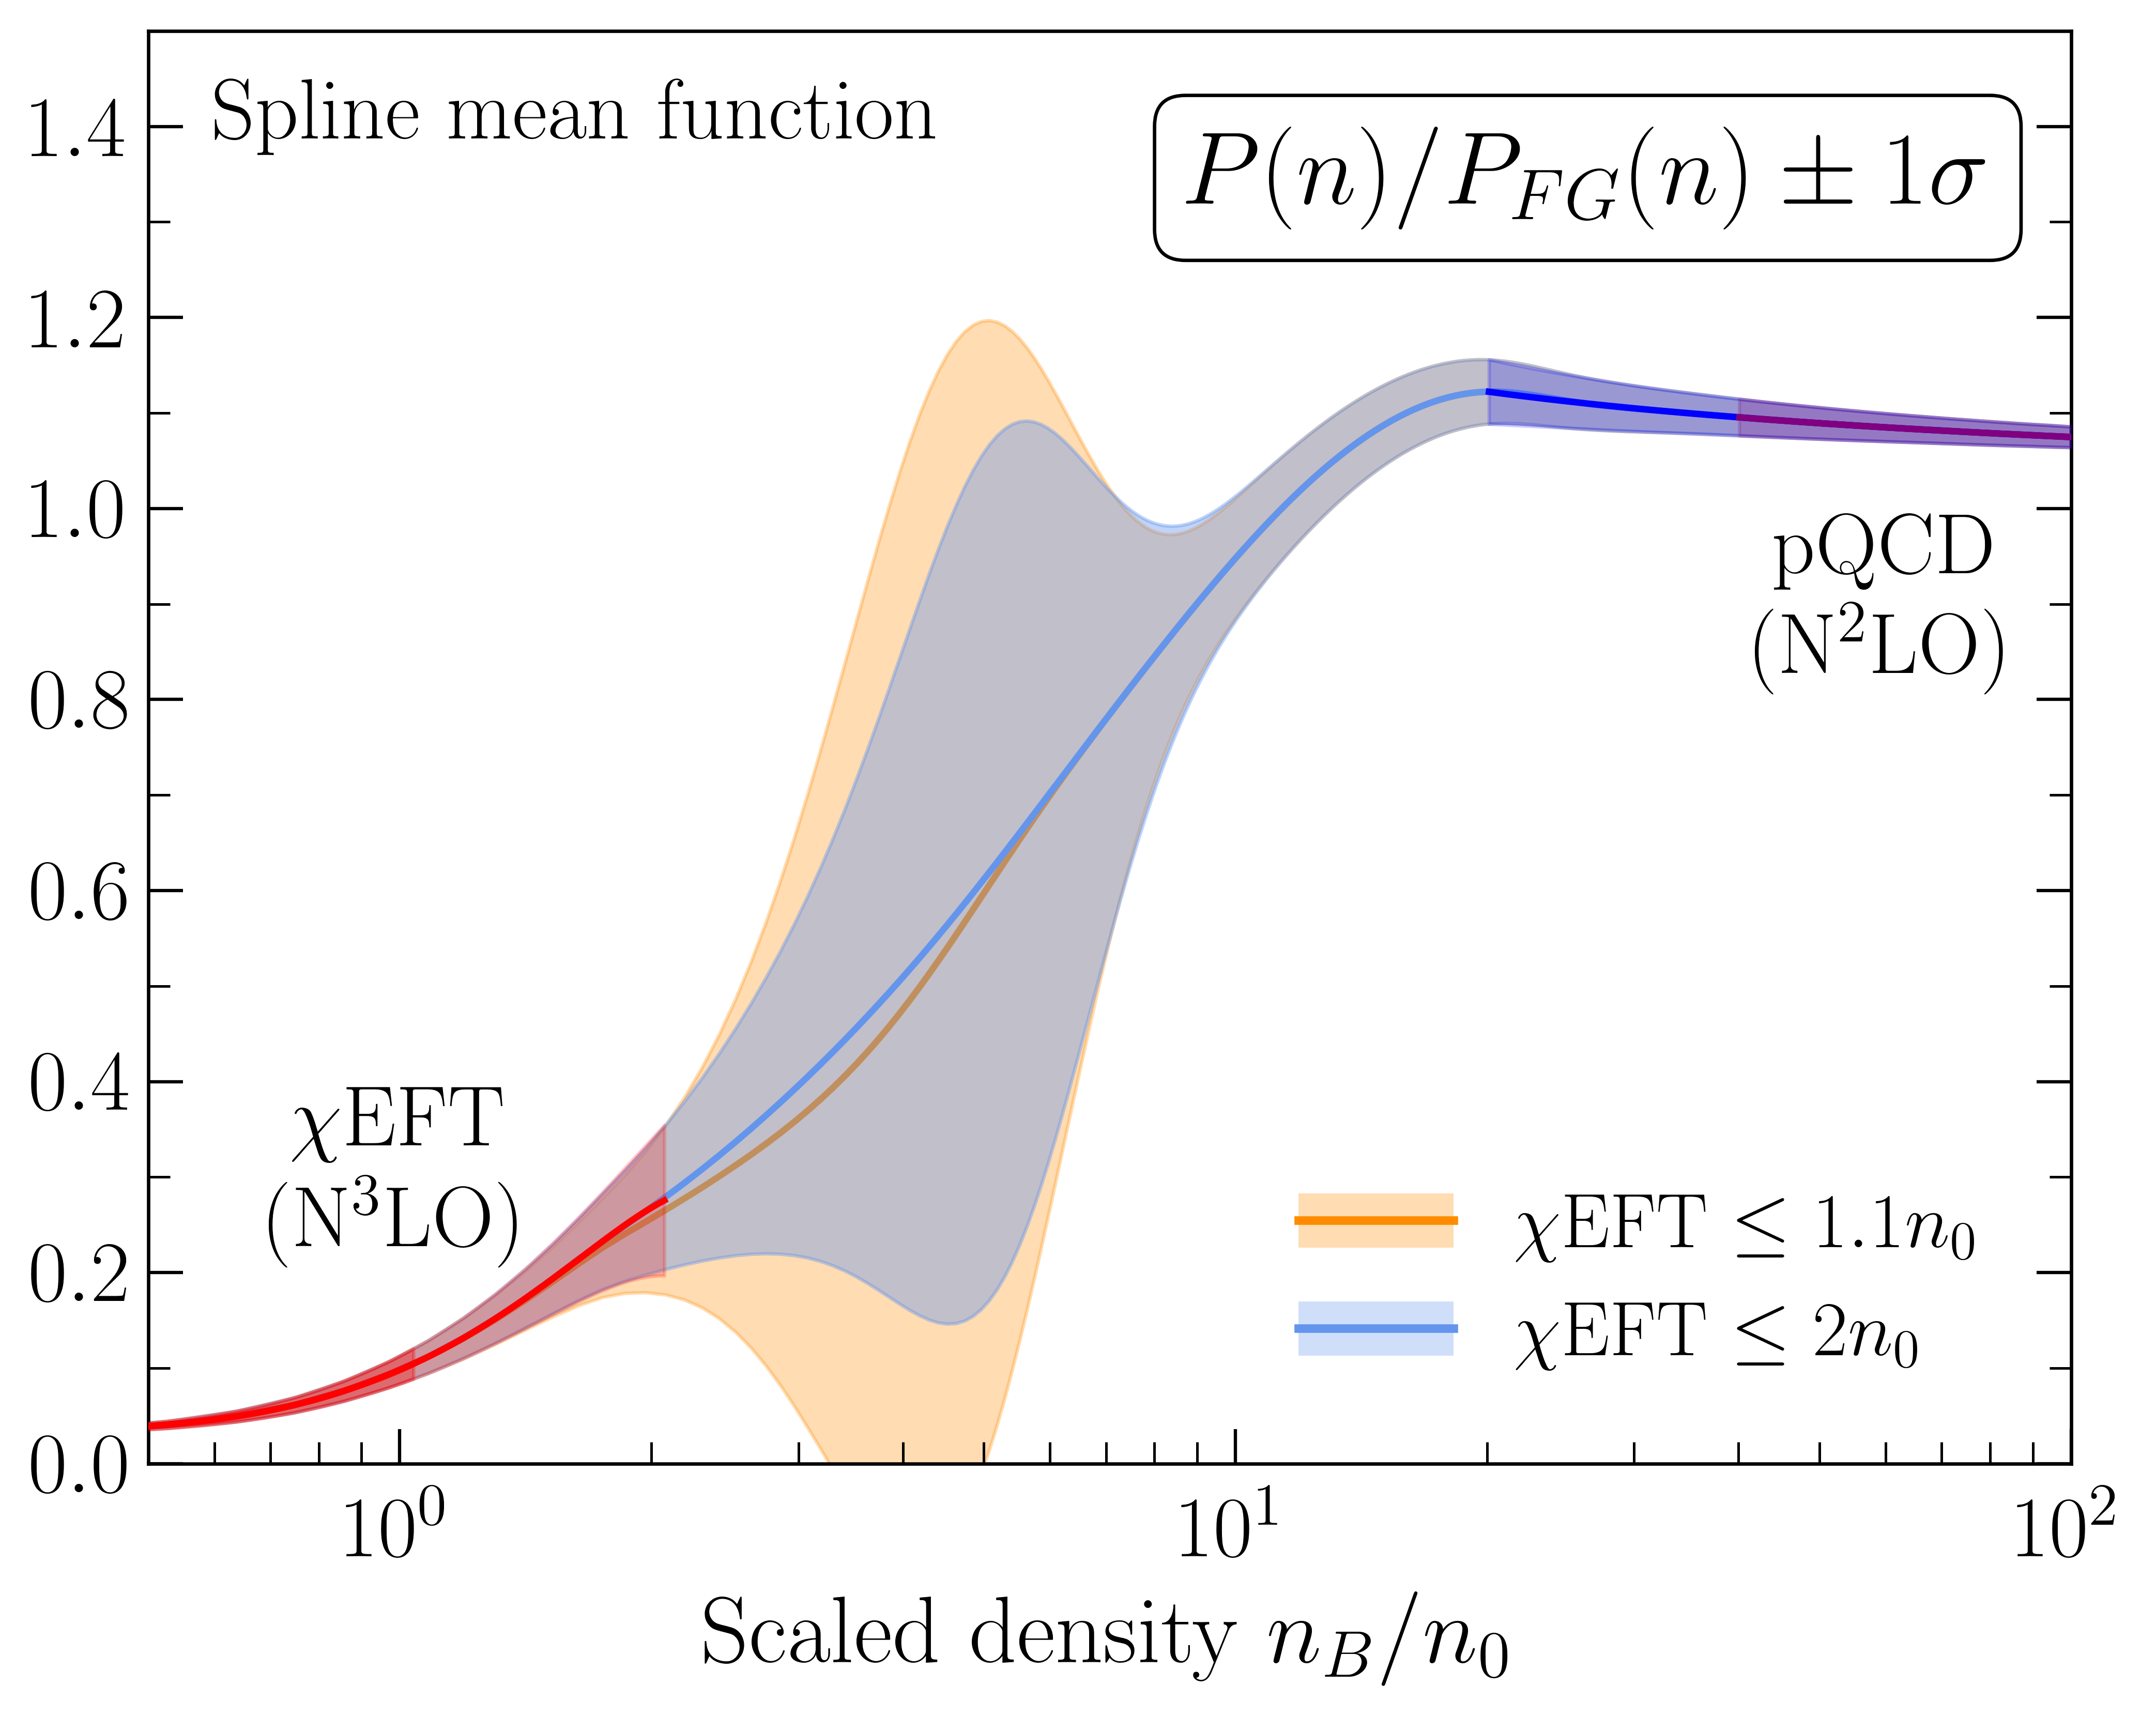

In [5]:
# data imports
pres_0 = np.load('../data/Paper_data/info_pres_20n0_True_0.npz')
pres_1 = np.load('../data/Paper_data/info_pres_20n0_True_1.npz')
pres_2 = np.load('../data/Paper_data/info_pres_20n0_True_2.npz')
pres_3 = np.load('../data/Paper_data/info_pres_20n0_True_3.npz')

pres_0_chiral = np.load('../data/Paper_data/info_pres_20n0_True_0_chiral.npz')
pres_1_chiral = np.load('../data/Paper_data/info_pres_20n0_True_1_chiral.npz')
pres_2_chiral = np.load('../data/Paper_data/info_pres_20n0_True_2_chiral.npz')
pres_3_chiral = np.load('../data/Paper_data/info_pres_20n0_True_3_chiral.npz')

# training points for pressure
points = np.load('points_pres_spline_20n0.npz')
points2 = np.load('points_pres_spline_20n0_chiral.npz')

# set up the plot requirements
fig, ax = plt.subplots(1, 1, figsize=(8,6), dpi=600)

# first panel (pressure)
ax.set_xlim(0.5, 100.0)
ax.set_ylim(0.0,1.5)
ax.tick_params(axis='x', which='major', labelsize=20, right=True, pad=8, length=8)
ax.tick_params(axis='x', which='minor', labelsize=20, right=True, pad=8, length=5)
ax.tick_params(axis='y', which='major', labelsize=20, right=True, length=8)
ax.tick_params(axis='y', which='minor', labelsize=20, right=True, length=5)
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.text(
    80.0,1.4, r'$P(n)/P_{FG}(n) \pm 1\sigma$', ha='right', va='top',
    multialignment='center', zorder=10, fontsize=24,
    bbox=dict(facecolor='w', boxstyle='round')
)
ax.text(0.6, 1.45, r'''Spline mean function''', ha='left', va='top', fontsize=20)
ax.set_xlabel(r'Scaled density $n_B/n_{0}$', fontsize=22)
ax.set_xscale('log')

# pressure data
ax.plot(pres_0['dens']/n0, pres_0['mean'], color='cornflowerblue', zorder=3)
ax.fill_between(pres_0['dens']/n0, pres_0['mean']-pres_0['std'], \
                   pres_0['mean']+pres_0['std'], color='cornflowerblue', alpha=0.4, zorder=2)

ax.plot(pres_0_chiral['dens']/n0, pres_0_chiral['mean'], color='darkorange', zorder=1)
ax.fill_between(pres_0_chiral['dens']/n0, pres_0_chiral['mean']-pres_0_chiral['std'], \
                   pres_0_chiral['mean']+pres_0_chiral['std'], color='darkorange', alpha=0.3,\
                zorder=0)

ind_sat = np.where([xeft['density'][i] >= 0.171 for i in range(len(xeft['density']))])[0][0]

ax.plot(pqcd_20['dens']/n0, pqcd_20['mean'], color='blue', zorder=11)
ax.fill_between(pqcd_20['dens']/n0, pqcd_20['mean']-pqcd_20['std'], pqcd_20['mean']+pqcd_20['std'], \
                 alpha=0.2, color='blue', zorder=10)
ax.plot(pqcd_40['dens']/n0, pqcd_40['mean'], color='purple', zorder=11)
ax.fill_between(pqcd_40['dens']/n0, pqcd_40['mean']-pqcd_40['std'], pqcd_40['mean']+pqcd_40['std'], \
                 alpha=0.2, color='purple', zorder=10)

ax.plot(xeft['density']/n0, xeft['mean'], color='red', zorder=11)
ax.fill_between(xeft['density']/n0, xeft['mean']-xeft['std_dev'], xeft['mean']+xeft['std_dev'], \
                   color='red', alpha=0.2, zorder=10)

ax.plot(xeft['density'][:ind_sat]/n0, xeft['mean'][:ind_sat], color='red', zorder=16)
ax.fill_between(xeft['density'][:ind_sat]/n0, xeft['mean'][:ind_sat]-xeft['std_dev'][:ind_sat], \
                xeft['mean'][:ind_sat]+xeft['std_dev'][:ind_sat], \
                   color='red', alpha=0.3, zorder=15)

ax.text(60.0, 0.9, r'''pQCD
(N$^2$LO)''', va='center', ha='center', fontsize=20)
ax.text(1.0, 0.30, r'''$\chi$EFT
(N$^3$LO)''', va='center', ha='center', fontsize=20)

# legends
#ax.legend(fontsize=18, loc='lower right', frameon=False)
legend_entries = [
    (('darkorange', 'darkorange'), "$\chi$EFT $\leq 1.1n_{0}$"),
    (('cornflowerblue', 'cornflowerblue'), "$\chi$EFT $\leq 2n_{0}$"),
]

# Apply function
add_uncertainty_legend(fig, ax, legend_entries, fontsize=18, alpha=0.3)
plt.show()

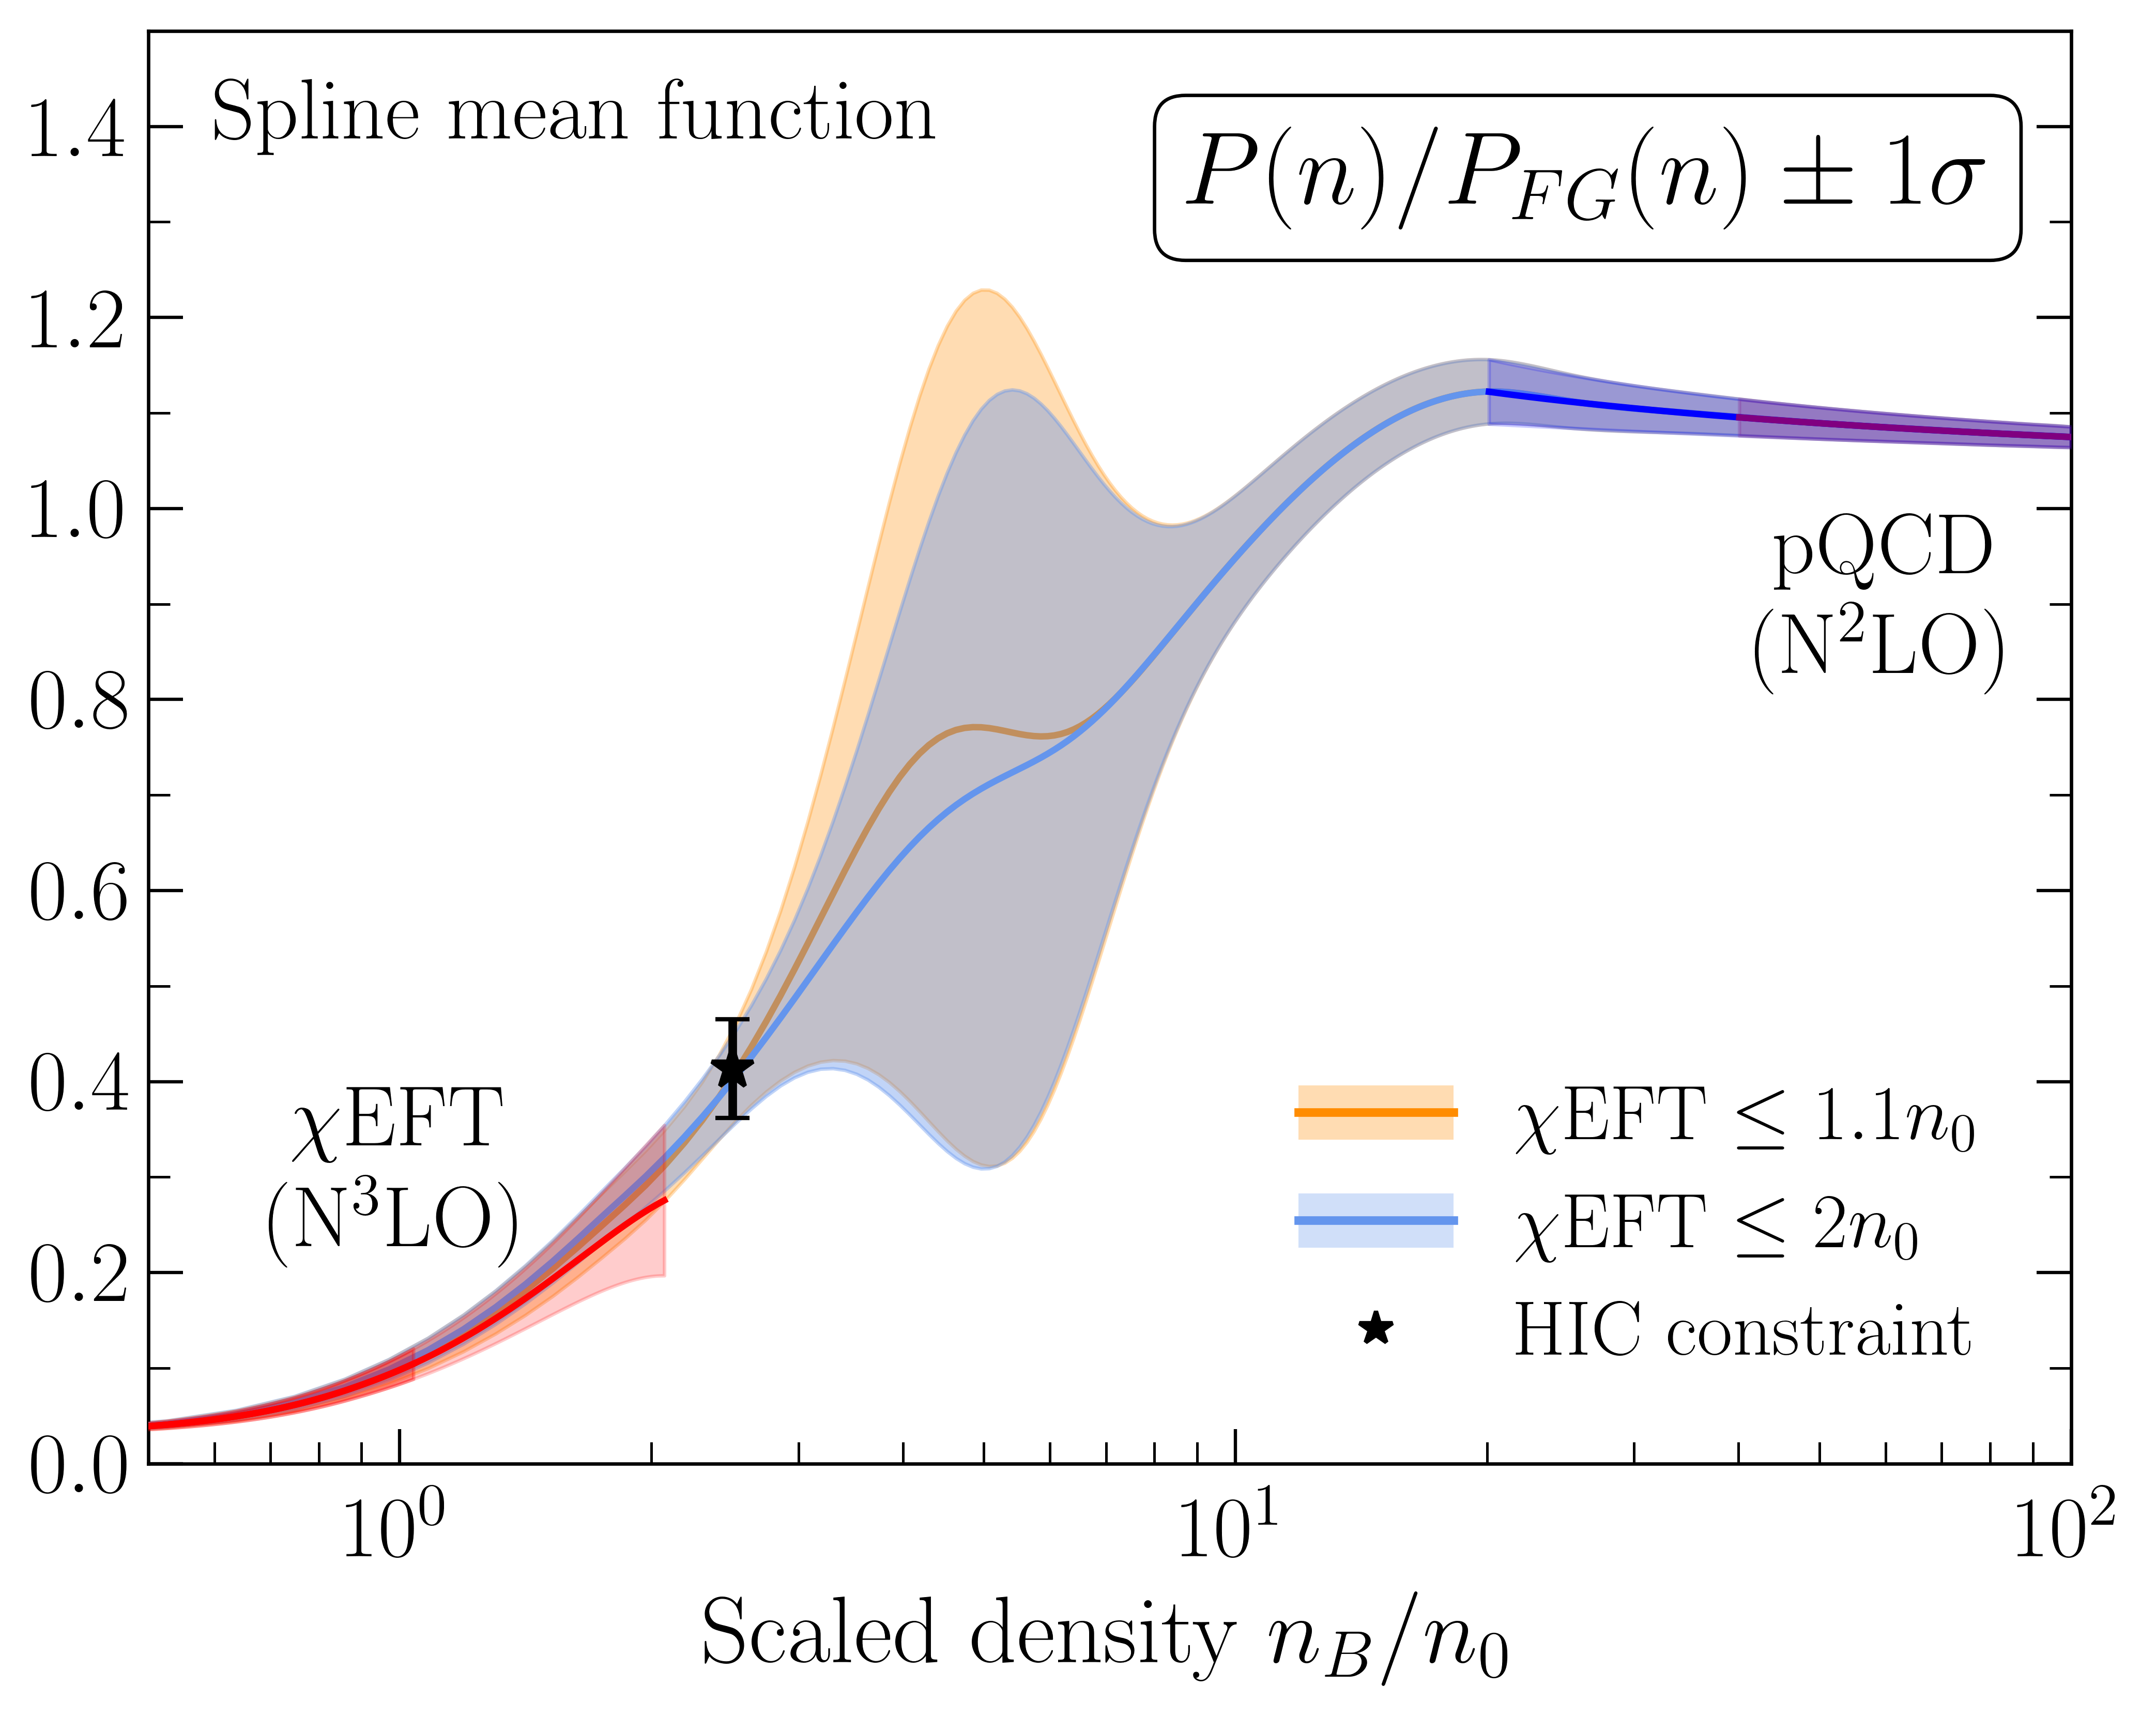

In [6]:
# set up the plot requirements
fig, ax = plt.subplots(1, 1, figsize=(8,6), dpi=600)

# first panel (pressure)
ax.set_xlim(0.5, 100.0)
ax.set_ylim(0.0,1.5)
ax.tick_params(axis='x', which='major', labelsize=20, right=True, pad=8, length=8)
ax.tick_params(axis='x', which='minor', labelsize=20, right=True, pad=8, length=5)
ax.tick_params(axis='y', which='major', labelsize=20, right=True, length=8)
ax.tick_params(axis='y', which='minor', labelsize=20, right=True, length=5)
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.text(
    80.0,1.4, r'$P(n)/P_{FG}(n) \pm 1\sigma$', ha='right', va='top',
    multialignment='center', zorder=10, fontsize=24,
    bbox=dict(facecolor='w', boxstyle='round')
)
ax.text(0.6, 1.45, r'''Spline mean function''', ha='left', va='top', fontsize=20)
ax.set_xlabel(r'Scaled density $n_B/n_{0}$', fontsize=22)
ax.set_xscale('log')

# pressure data
ax.plot(pres_1['dens']/n0, pres_1['mean'], color='cornflowerblue', zorder=3)
ax.fill_between(pres_1['dens']/n0, pres_1['mean']-pres_1['std'], \
                   pres_1['mean']+pres_1['std'], color='cornflowerblue', alpha=0.4, zorder=2)

ax.plot(pres_1_chiral['dens']/n0, pres_1_chiral['mean'], color='darkorange', zorder=1)
ax.fill_between(pres_1_chiral['dens']/n0, pres_1_chiral['mean']-pres_1_chiral['std'], \
                   pres_1_chiral['mean']+pres_1_chiral['std'], color='darkorange', alpha=0.3,\
                zorder=0)

# set up with proper colours HIC 
ax.errorbar(points['dens'][4]/n0, points['mean'][4], points['std'][4], marker='*', capsize=4, \
               linestyle=' ', markersize=10, elinewidth=2, zorder=10, color='black')

#################

ind_sat = np.where([xeft['density'][i] >= 0.171 for i in range(len(xeft['density']))])[0][0]

ax.plot(pqcd_20['dens']/n0, pqcd_20['mean'], color='blue', zorder=11)
ax.fill_between(pqcd_20['dens']/n0, pqcd_20['mean']-pqcd_20['std'], pqcd_20['mean']+pqcd_20['std'], \
                 alpha=0.2, color='blue', zorder=10)
ax.plot(pqcd_40['dens']/n0, pqcd_40['mean'], color='purple', zorder=11)
ax.fill_between(pqcd_40['dens']/n0, pqcd_40['mean']-pqcd_40['std'], pqcd_40['mean']+pqcd_40['std'], \
                 alpha=0.2, color='purple', zorder=10)

ax.plot(xeft['density']/n0, xeft['mean'], color='red', zorder=11)
ax.fill_between(xeft['density']/n0, xeft['mean']-xeft['std_dev'], xeft['mean']+xeft['std_dev'], \
                   color='red', alpha=0.2, zorder=10)

ax.plot(xeft['density'][:ind_sat]/n0, xeft['mean'][:ind_sat], color='red', zorder=16)
ax.fill_between(xeft['density'][:ind_sat]/n0, xeft['mean'][:ind_sat]-xeft['std_dev'][:ind_sat], \
                xeft['mean'][:ind_sat]+xeft['std_dev'][:ind_sat], \
                   color='red', alpha=0.3, zorder=15)

ax.text(60.0, 0.9, r'''pQCD
(N$^2$LO)''', va='center', ha='center', fontsize=20)
ax.text(1.0, 0.30, r'''$\chi$EFT
(N$^3$LO)''', va='center', ha='center', fontsize=20)

# legends
#ax.legend(fontsize=18, loc='lower right', frameon=False)
legend_entries = [
    (('darkorange', 'darkorange'), "$\chi$EFT $\leq 1.1n_{0}$"),
    (('cornflowerblue', 'cornflowerblue'), "$\chi$EFT $\leq 2n_{0}$"),
]

error_bar_entries = [
    ('*', 'black', "HIC constraint"),
]


# Apply function
add_uncertainty_legend(fig, ax, legend_entries, error_bar_entries, fontsize=18, alpha=0.3)
plt.show()

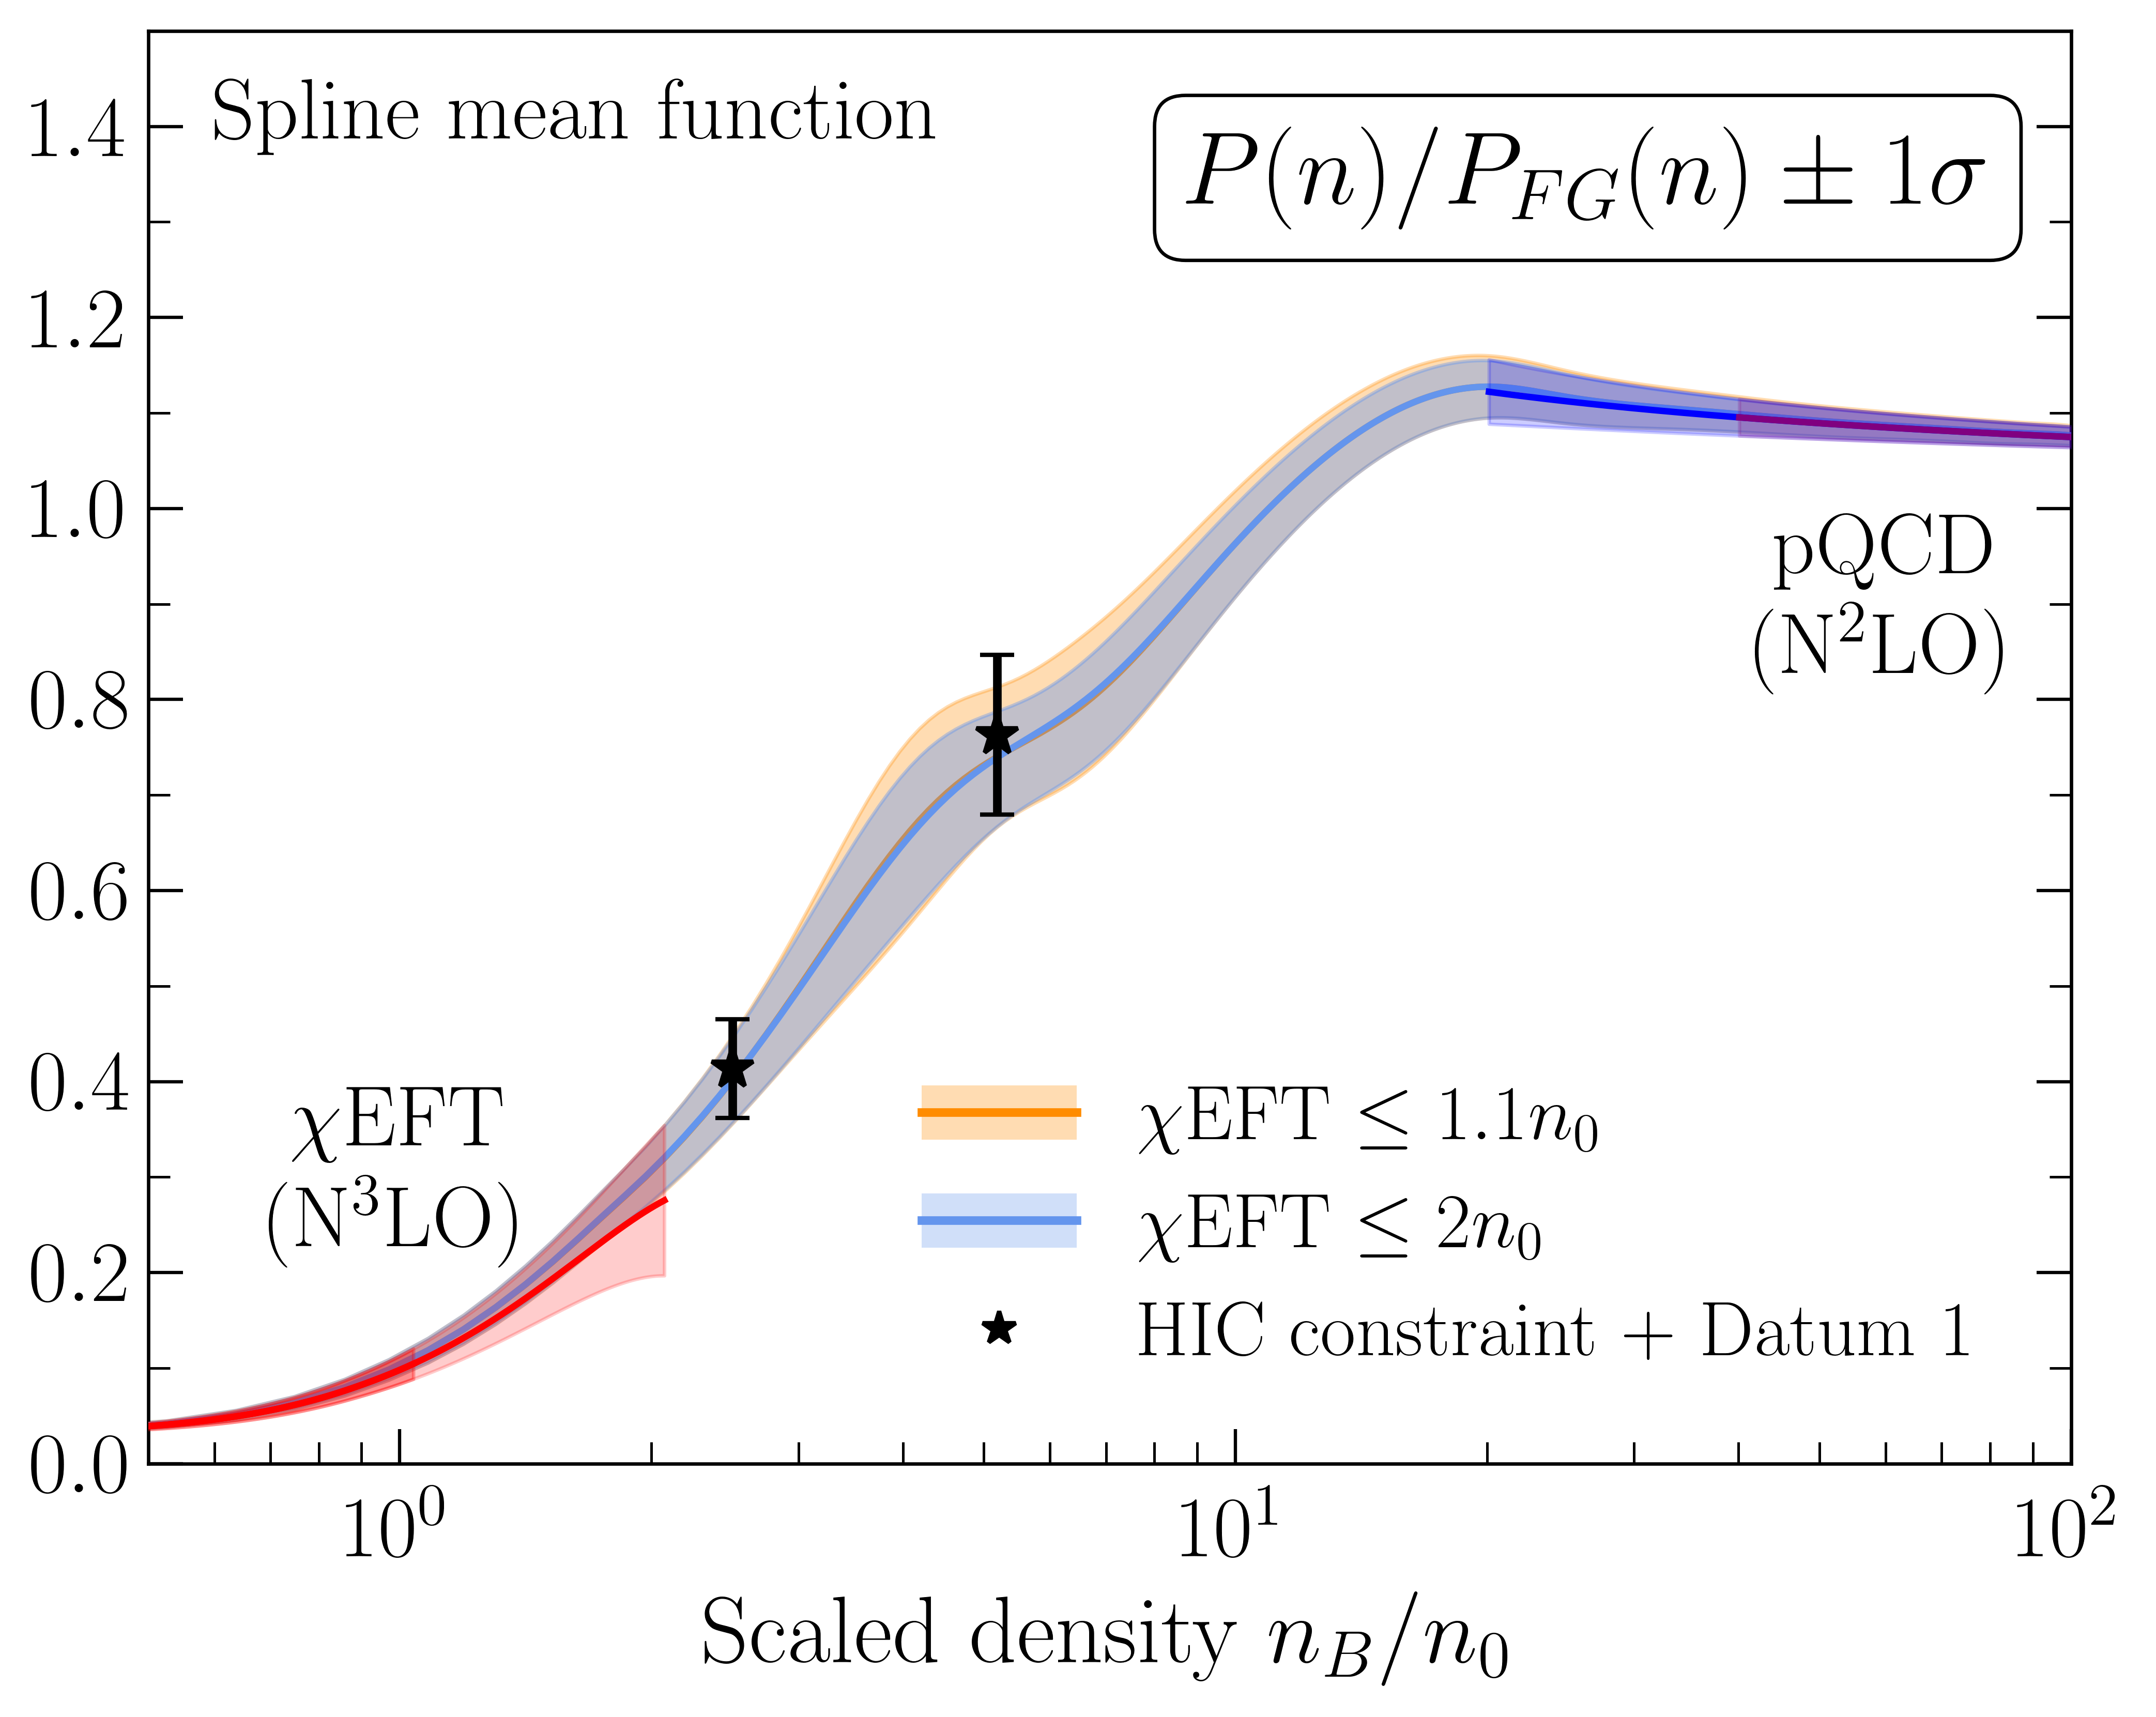

In [7]:
# set up the plot requirements
fig, ax = plt.subplots(1, 1, figsize=(8,6), dpi=600)

# first panel (pressure)
ax.set_xlim(0.5, 100.0)
ax.set_ylim(0.0,1.5)
ax.tick_params(axis='x', which='major', labelsize=20, right=True, pad=8, length=8)
ax.tick_params(axis='x', which='minor', labelsize=20, right=True, pad=8, length=5)
ax.tick_params(axis='y', which='major', labelsize=20, right=True, length=8)
ax.tick_params(axis='y', which='minor', labelsize=20, right=True, length=5)
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.text(
    80.0,1.4, r'$P(n)/P_{FG}(n) \pm 1\sigma$', ha='right', va='top',
    multialignment='center', zorder=10, fontsize=24,
    bbox=dict(facecolor='w', boxstyle='round')
)
ax.text(0.6, 1.45, r'''Spline mean function''', ha='left', va='top', fontsize=20)
ax.set_xlabel(r'Scaled density $n_B/n_{0}$', fontsize=22)
ax.set_xscale('log')

# pressure data
ax.plot(pres_2['dens']/n0, pres_2['mean'], color='cornflowerblue', zorder=3)
ax.fill_between(pres_2['dens']/n0, pres_2['mean']-pres_2['std'], \
                   pres_1['mean']+pres_2['std'], color='cornflowerblue', alpha=0.4, zorder=2)

ax.plot(pres_2_chiral['dens']/n0, pres_2_chiral['mean'], color='darkorange', zorder=1)
ax.fill_between(pres_2_chiral['dens']/n0, pres_2_chiral['mean']-pres_2_chiral['std'], \
                   pres_2_chiral['mean']+pres_2_chiral['std'], color='darkorange', alpha=0.3,\
                zorder=0)

ax.errorbar(points['dens'][4:6]/n0, points['mean'][4:6], points['std'][4:6], marker='*', capsize=4, \
               linestyle=' ', markersize=10, elinewidth=2, zorder=10, color='black')

#################

ind_sat = np.where([xeft['density'][i] >= 0.171 for i in range(len(xeft['density']))])[0][0]

ax.plot(pqcd_20['dens']/n0, pqcd_20['mean'], color='blue', zorder=11)
ax.fill_between(pqcd_20['dens']/n0, pqcd_20['mean']-pqcd_20['std'], pqcd_20['mean']+pqcd_20['std'], \
                 alpha=0.2, color='blue', zorder=10)
ax.plot(pqcd_40['dens']/n0, pqcd_40['mean'], color='purple', zorder=11)
ax.fill_between(pqcd_40['dens']/n0, pqcd_40['mean']-pqcd_40['std'], pqcd_40['mean']+pqcd_40['std'], \
                 alpha=0.2, color='purple', zorder=10)

ax.plot(xeft['density']/n0, xeft['mean'], color='red', zorder=11)
ax.fill_between(xeft['density']/n0, xeft['mean']-xeft['std_dev'], xeft['mean']+xeft['std_dev'], \
                   color='red', alpha=0.2, zorder=10)

ax.plot(xeft['density'][:ind_sat]/n0, xeft['mean'][:ind_sat], color='red', zorder=16)
ax.fill_between(xeft['density'][:ind_sat]/n0, xeft['mean'][:ind_sat]-xeft['std_dev'][:ind_sat], \
                xeft['mean'][:ind_sat]+xeft['std_dev'][:ind_sat], \
                   color='red', alpha=0.3, zorder=15)

ax.text(60.0, 0.9, r'''pQCD
(N$^2$LO)''', va='center', ha='center', fontsize=20)
ax.text(1.0, 0.30, r'''$\chi$EFT
(N$^3$LO)''', va='center', ha='center', fontsize=20)

# legends
#ax.legend(fontsize=18, loc='lower right', frameon=False)
legend_entries = [
    (('darkorange', 'darkorange'), "$\chi$EFT $\leq 1.1n_{0}$"),
    (('cornflowerblue', 'cornflowerblue'), "$\chi$EFT $\leq 2n_{0}$"),
]

error_bar_entries = [
    ('*', 'black', "HIC constraint + Datum 1"),
]

# Apply function
add_uncertainty_legend(fig, ax, legend_entries, error_bar_entries, fontsize=18, alpha=0.3)
plt.show()

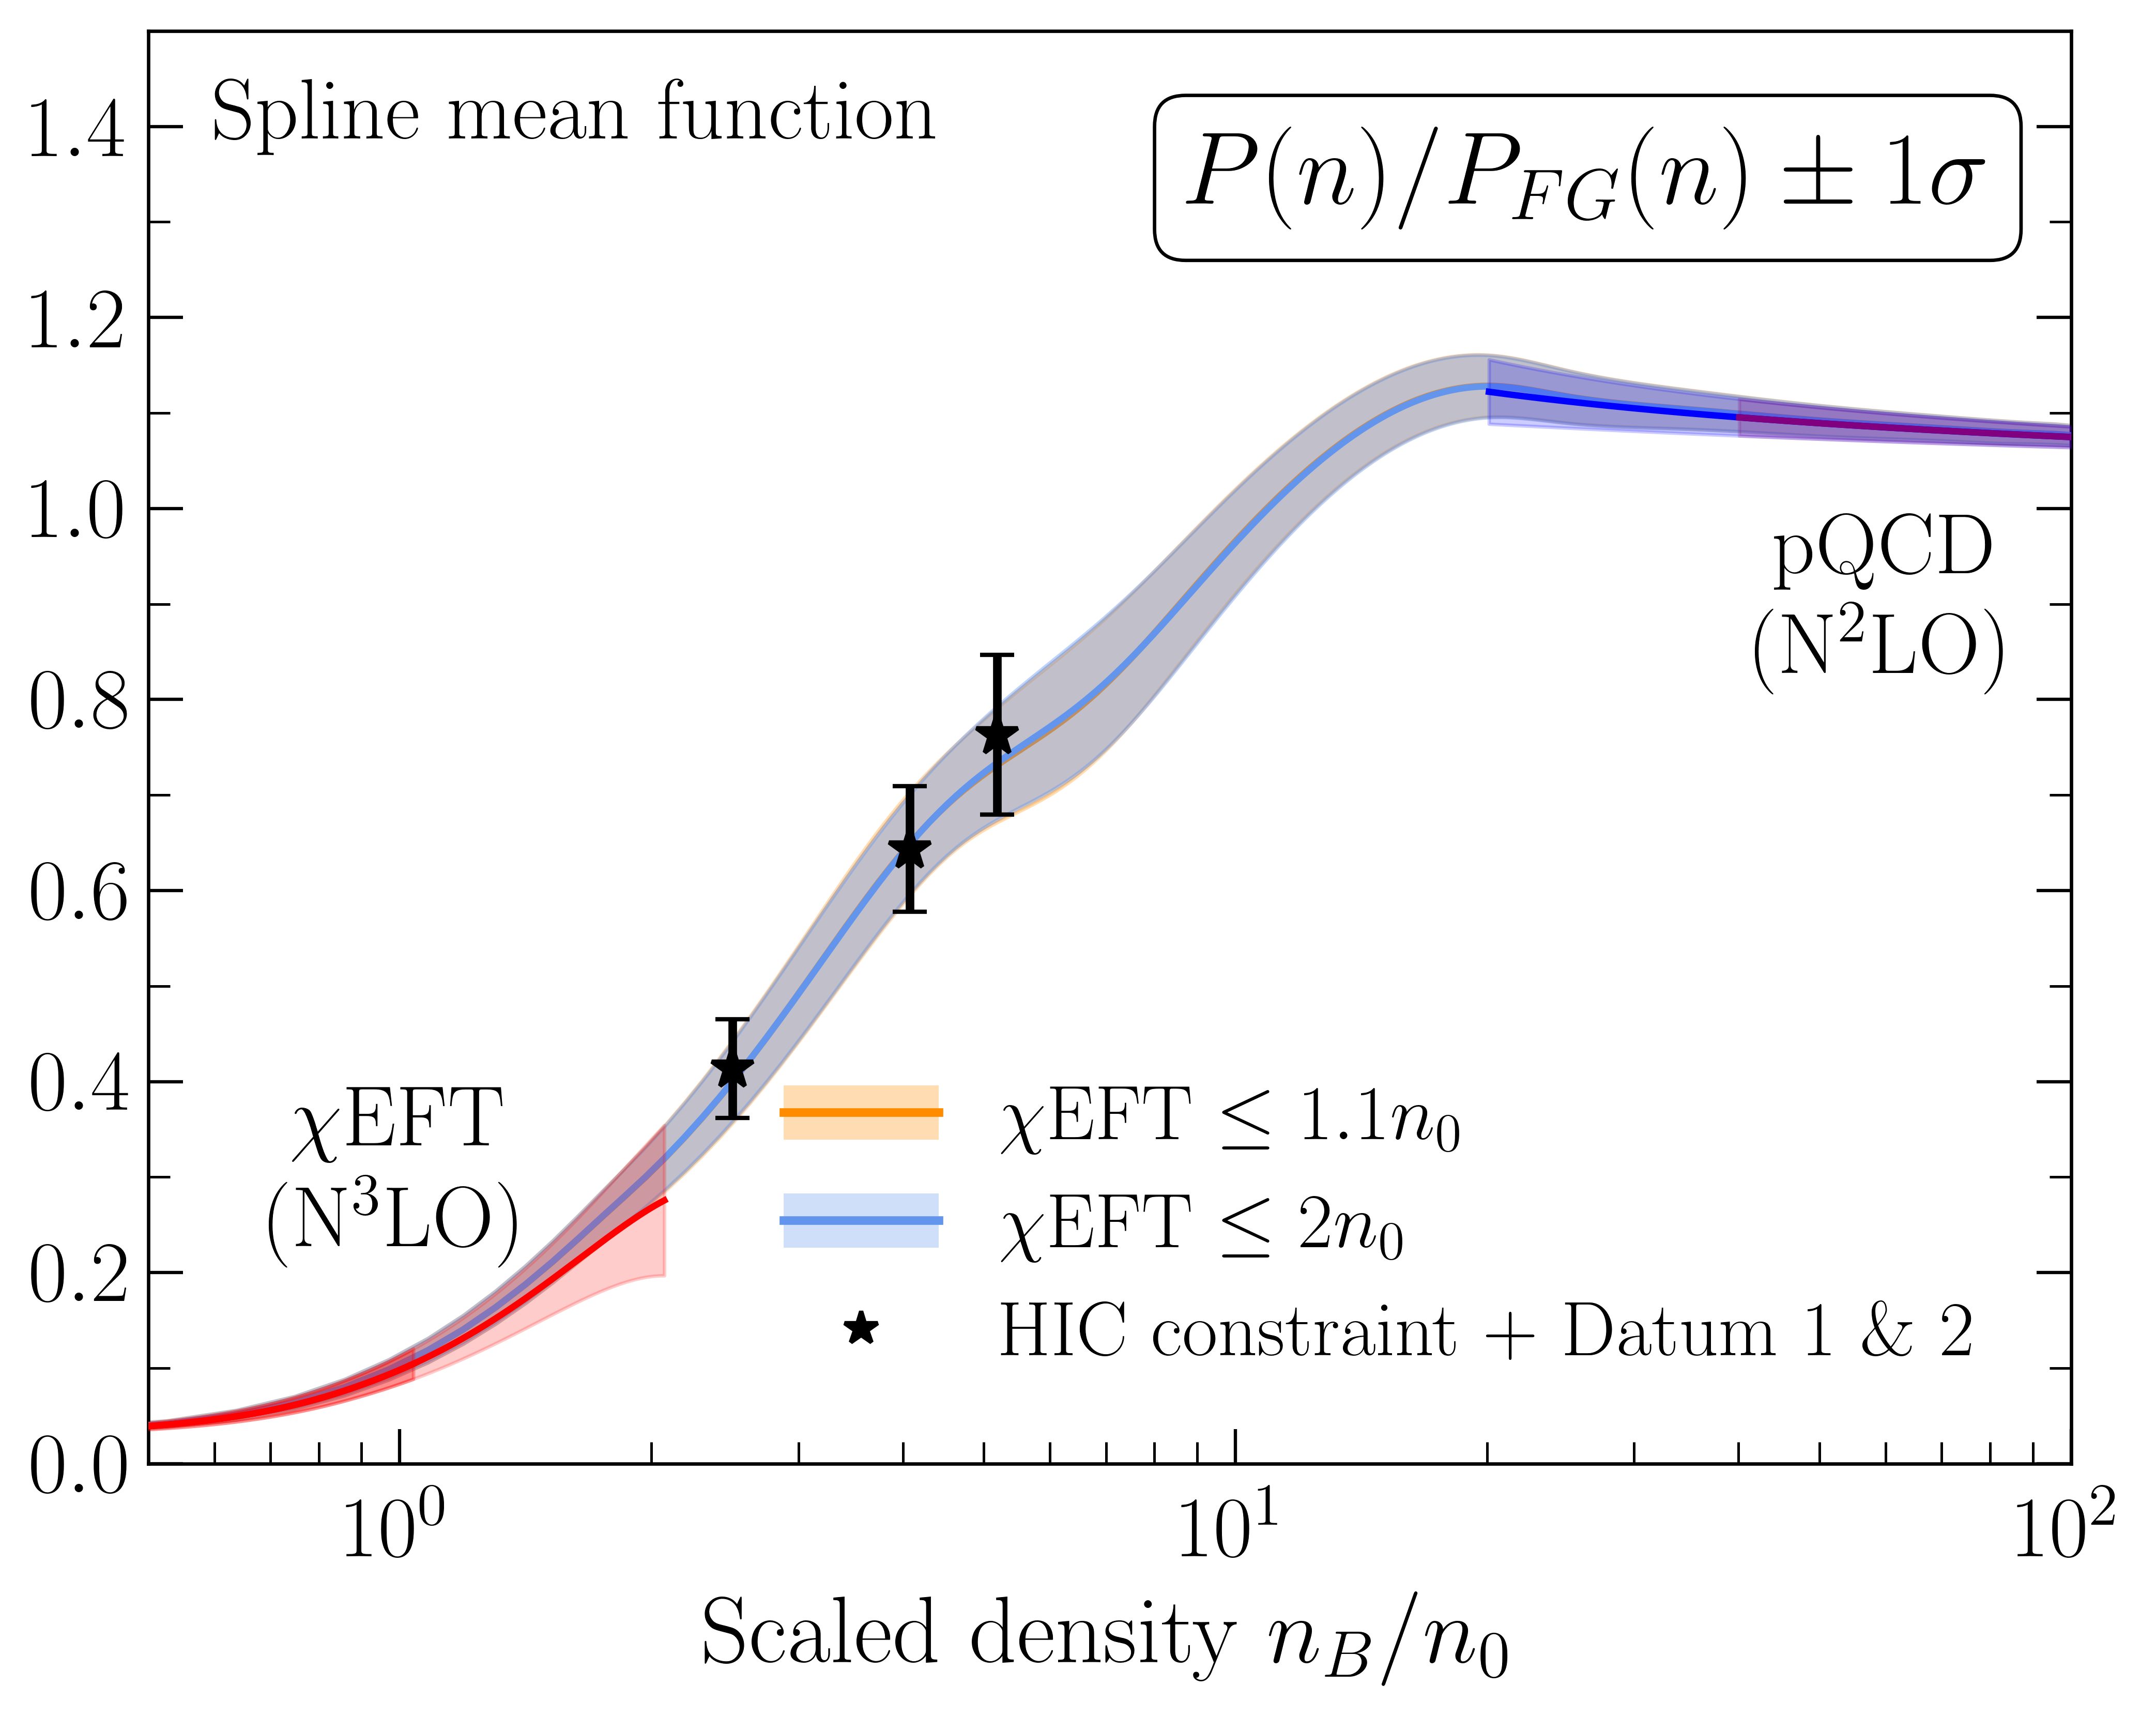

In [8]:
# set up the plot requirements
fig, ax = plt.subplots(1, 1, figsize=(8,6), dpi=600)

# first panel (pressure)
ax.set_xlim(0.5, 100.0)
ax.set_ylim(0.0,1.5)
ax.tick_params(axis='x', which='major', labelsize=20, right=True, pad=8, length=8)
ax.tick_params(axis='x', which='minor', labelsize=20, right=True, pad=8, length=5)
ax.tick_params(axis='y', which='major', labelsize=20, right=True, length=8)
ax.tick_params(axis='y', which='minor', labelsize=20, right=True, length=5)
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.text(
    80.0,1.4, r'$P(n)/P_{FG}(n) \pm 1\sigma$', ha='right', va='top',
    multialignment='center', zorder=10, fontsize=24,
    bbox=dict(facecolor='w', boxstyle='round')
)
ax.text(0.6, 1.45, r'''Spline mean function''', ha='left', va='top', fontsize=20)
ax.set_xlabel(r'Scaled density $n_B/n_{0}$', fontsize=22)
ax.set_xscale('log')

# pressure data
ax.plot(pres_3['dens']/n0, pres_3['mean'], color='cornflowerblue', zorder=3)
ax.fill_between(pres_3['dens']/n0, pres_3['mean']-pres_3['std'], \
                   pres_3['mean']+pres_3['std'], color='cornflowerblue', alpha=0.4, zorder=2)

ax.plot(pres_3_chiral['dens']/n0, pres_3_chiral['mean'], color='darkorange', zorder=1)
ax.fill_between(pres_3_chiral['dens']/n0, pres_3_chiral['mean']-pres_3_chiral['std'], \
                   pres_3_chiral['mean']+pres_3_chiral['std'], color='darkorange', alpha=0.3,\
                zorder=0)

# set up with proper colours HIC 
ax.errorbar(points['dens'][4:7]/n0, points['mean'][4:7], points['std'][4:7], marker='*', capsize=4, \
               linestyle=' ', markersize=10, elinewidth=2, zorder=10, color='black')

#################

ind_sat = np.where([xeft['density'][i] >= 0.171 for i in range(len(xeft['density']))])[0][0]

ax.plot(pqcd_20['dens']/n0, pqcd_20['mean'], color='blue', zorder=11)
ax.fill_between(pqcd_20['dens']/n0, pqcd_20['mean']-pqcd_20['std'], pqcd_20['mean']+pqcd_20['std'], \
                 alpha=0.2, color='blue', zorder=10)
ax.plot(pqcd_40['dens']/n0, pqcd_40['mean'], color='purple', zorder=11)
ax.fill_between(pqcd_40['dens']/n0, pqcd_40['mean']-pqcd_40['std'], pqcd_40['mean']+pqcd_40['std'], \
                 alpha=0.2, color='purple', zorder=10)

ax.plot(xeft['density']/n0, xeft['mean'], color='red', zorder=11)
ax.fill_between(xeft['density']/n0, xeft['mean']-xeft['std_dev'], xeft['mean']+xeft['std_dev'], \
                   color='red', alpha=0.2, zorder=10)

ax.plot(xeft['density'][:ind_sat]/n0, xeft['mean'][:ind_sat], color='red', zorder=16)
ax.fill_between(xeft['density'][:ind_sat]/n0, xeft['mean'][:ind_sat]-xeft['std_dev'][:ind_sat], \
                xeft['mean'][:ind_sat]+xeft['std_dev'][:ind_sat], \
                   color='red', alpha=0.3, zorder=15)

ax.text(60.0, 0.9, r'''pQCD
(N$^2$LO)''', va='center', ha='center', fontsize=20)
ax.text(1.0, 0.30, r'''$\chi$EFT
(N$^3$LO)''', va='center', ha='center', fontsize=20)

# legends
#ax.legend(fontsize=18, loc='lower right', frameon=False)
legend_entries = [
    (('darkorange', 'darkorange'), "$\chi$EFT $\leq 1.1n_{0}$"),
    (('cornflowerblue', 'cornflowerblue'), "$\chi$EFT $\leq 2n_{0}$"),
]

error_bar_entries = [
    ('*', 'black', "HIC constraint + Datum 1 \& 2"),
]


# Apply function
add_uncertainty_legend(fig, ax, legend_entries, error_bar_entries, fontsize=18, alpha=0.3)
plt.show()

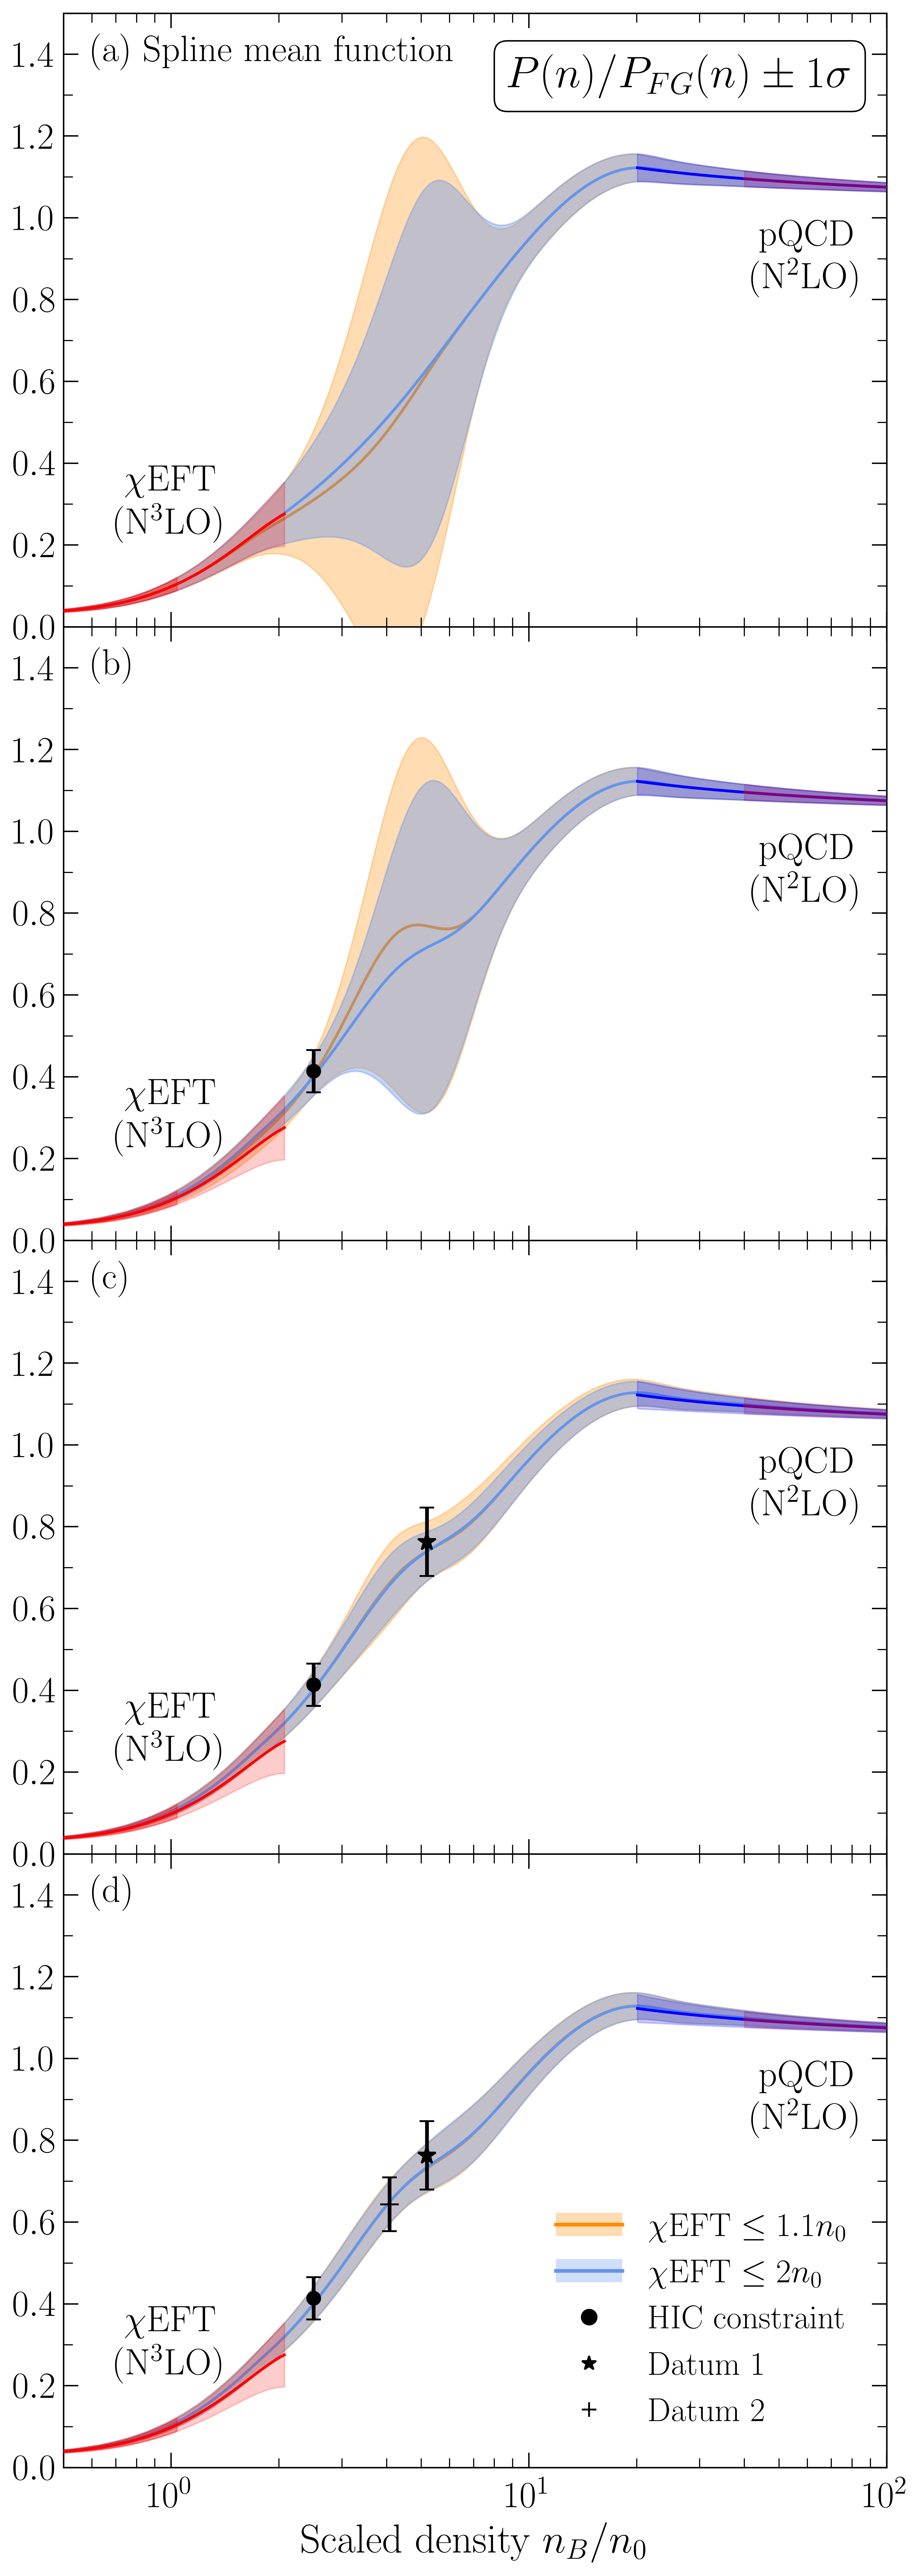

In [28]:
# 4-panel plot showing the above results
fig, axes = plt.subplots(4, 1, figsize=(8,24), dpi=600, sharex=True, gridspec_kw={'hspace':0})

# legends
legend_entries = [
    (('darkorange', 'darkorange'), "$\chi$EFT $\leq 1.1n_{0}$"),
    (('cornflowerblue', 'cornflowerblue'), "$\chi$EFT $\leq 2n_{0}$"),
]

error_bar_entries = [
    ('o', 'black', "HIC constraint"),
    ('*', 'black', "Datum 1"),
    ('+', 'black', "Datum 2")
]

# common axes arguments
for ax in axes:
    ax.set_xlim(0.5, 100.0)
    ax.set_ylim(0.0,1.5)
    ax.tick_params(axis='x', which='major', labelsize=20, right=True, top=True, pad=8, length=8)
    ax.tick_params(axis='x', which='minor', labelsize=20, right=True, top=True, pad=8, length=5)
    ax.tick_params(axis='y', which='major', labelsize=20, right=True, length=8)
    ax.tick_params(axis='y', which='minor', labelsize=20, right=True, length=5)
    ax.xaxis.set_major_locator(MultipleLocator(10))
    ax.yaxis.set_minor_locator(MultipleLocator(0.1))
    ax.set_xscale('log')
    ind_sat = np.where([xeft['density'][i] >= 0.171 for i in range(len(xeft['density']))])[0][0]

    ax.plot(pqcd_20['dens']/n0, pqcd_20['mean'], color='blue', zorder=11)
    ax.fill_between(pqcd_20['dens']/n0, pqcd_20['mean']-pqcd_20['std'], pqcd_20['mean']+pqcd_20['std'], \
                     alpha=0.2, color='blue', zorder=10)
    ax.plot(pqcd_40['dens']/n0, pqcd_40['mean'], color='purple', zorder=11)
    ax.fill_between(pqcd_40['dens']/n0, pqcd_40['mean']-pqcd_40['std'], pqcd_40['mean']+pqcd_40['std'], \
                     alpha=0.2, color='purple', zorder=10)

    ax.plot(xeft['density']/n0, xeft['mean'], color='red', zorder=11)
    ax.fill_between(xeft['density']/n0, xeft['mean']-xeft['std_dev'], xeft['mean']+xeft['std_dev'], \
                       color='red', alpha=0.2, zorder=10)

    ax.plot(xeft['density'][:ind_sat]/n0, xeft['mean'][:ind_sat], color='red', zorder=16)
    ax.fill_between(xeft['density'][:ind_sat]/n0, xeft['mean'][:ind_sat]-xeft['std_dev'][:ind_sat], \
                    xeft['mean'][:ind_sat]+xeft['std_dev'][:ind_sat], \
                       color='red', alpha=0.3, zorder=15)

    ax.text(60.0, 0.9, r'''pQCD
    (N$^2$LO)''', va='center', ha='center', fontsize=20)
    ax.text(1.0, 0.30, r'''$\chi$EFT
    (N$^3$LO)''', va='center', ha='center', fontsize=20)
    
# data
axes[0].plot(pres_0['dens']/n0, pres_0['mean'], color='cornflowerblue', zorder=3)
axes[0].fill_between(pres_0['dens']/n0, pres_0['mean']-pres_0['std'], \
                   pres_0['mean']+pres_0['std'], color='cornflowerblue', alpha=0.4, zorder=2)

axes[0].plot(pres_0_chiral['dens']/n0, pres_0_chiral['mean'], color='darkorange', zorder=1)
axes[0].fill_between(pres_0_chiral['dens']/n0, pres_0_chiral['mean']-pres_0_chiral['std'], \
                   pres_0_chiral['mean']+pres_0_chiral['std'], color='darkorange', alpha=0.3,\
                zorder=0)

axes[1].plot(pres_1['dens']/n0, pres_1['mean'], color='cornflowerblue', zorder=3)
axes[1].fill_between(pres_1['dens']/n0, pres_1['mean']-pres_1['std'], \
                   pres_1['mean']+pres_1['std'], color='cornflowerblue', alpha=0.4, zorder=2)

axes[1].plot(pres_1_chiral['dens']/n0, pres_1_chiral['mean'], color='darkorange', zorder=1)
axes[1].fill_between(pres_1_chiral['dens']/n0, pres_1_chiral['mean']-pres_1_chiral['std'], \
                   pres_1_chiral['mean']+pres_1_chiral['std'], color='darkorange', alpha=0.3,\
                zorder=0)

# set up with proper colours HIC 
axes[1].errorbar(points['dens'][4]/n0, points['mean'][4], points['std'][4], marker='o', capsize=4, \
               linestyle=' ', markersize=7, elinewidth=2, zorder=10, color='black')

axes[2].plot(pres_2['dens']/n0, pres_2['mean'], color='cornflowerblue', zorder=3)
axes[2].fill_between(pres_2['dens']/n0, pres_2['mean']-pres_2['std'], \
                   pres_1['mean']+pres_2['std'], color='cornflowerblue', alpha=0.4, zorder=2)

axes[2].plot(pres_2_chiral['dens']/n0, pres_2_chiral['mean'], color='darkorange', zorder=1)
axes[2].fill_between(pres_2_chiral['dens']/n0, pres_2_chiral['mean']-pres_2_chiral['std'], \
                   pres_2_chiral['mean']+pres_2_chiral['std'], color='darkorange', alpha=0.3,\
                zorder=0)

axes[2].errorbar(points['dens'][4]/n0, points['mean'][4], points['std'][4], marker='o', capsize=4, \
               linestyle=' ', markersize=7, elinewidth=2, zorder=10, color='black')

axes[2].errorbar(points['dens'][5]/n0, points['mean'][5], points['std'][5], marker='*', capsize=4, \
               linestyle=' ', markersize=10, elinewidth=2, zorder=10, color='black')

axes[3].plot(pres_3['dens']/n0, pres_3['mean'], color='cornflowerblue', zorder=3)
axes[3].fill_between(pres_3['dens']/n0, pres_3['mean']-pres_3['std'], \
                   pres_3['mean']+pres_3['std'], color='cornflowerblue', alpha=0.4, zorder=2)

axes[3].plot(pres_3_chiral['dens']/n0, pres_3_chiral['mean'], color='darkorange', zorder=1)
axes[3].fill_between(pres_3_chiral['dens']/n0, pres_3_chiral['mean']-pres_3_chiral['std'], \
                   pres_3_chiral['mean']+pres_3_chiral['std'], color='darkorange', alpha=0.3,\
                zorder=0)

# set up with proper colours HIC
axes[3].errorbar(points['dens'][4]/n0, points['mean'][4], points['std'][4], marker='o', capsize=4, \
               linestyle=' ', markersize=7, elinewidth=2, zorder=10, color='black')

axes[3].errorbar(points['dens'][5]/n0, points['mean'][5], points['std'][5], marker='*', capsize=4, \
               linestyle=' ', markersize=10, elinewidth=2, zorder=10, color='black')

axes[3].errorbar(points['dens'][6]/n0, points['mean'][6], points['std'][6], marker='+', capsize=4, \
               linestyle=' ', markersize=10, elinewidth=2, zorder=10, color='black')

axes[0].text(0.6, 1.45, r'''(a) Spline mean function''', ha='left', va='top', fontsize=20)
axes[1].text(0.6, 1.45, r'''(b)''', ha='left', va='top', fontsize=20)
axes[2].text(0.6, 1.45, r'''(c)''', ha='left', va='top', fontsize=20)
axes[3].text(0.6, 1.45, r'''(d)''', ha='left', va='top', fontsize=20)
axes[0].text(
        80.0,1.4, r'$P(n)/P_{FG}(n) \pm 1\sigma$', ha='right', va='top',
        multialignment='center', zorder=10, fontsize=24,
        bbox=dict(facecolor='w', boxstyle='round')
    )
axes[3].set_xlabel(r'Scaled density $n_B/n_{0}$', fontsize=22)

add_uncertainty_legend(fig, axes[3], legend_entries, error_bar_entries, fontsize=18, alpha=0.3)
fig.savefig('../figures/ANM_Figures/chiral_comparison_20n0_4panel.pdf')
plt.show()

## M-R curve: non-stationary kernel

In [ ]:
# spline mean
tov1 = TOVsolver(eos_filepath='mock_test_data.npz')
tov2 = TOVsolver(eos_filepath='mock_test_data_hic.npz')
tov3 = TOVsolver(eos_filepath='mock_test_data_hic_plus_1.npz')
tov4 = TOVsolver(eos_filepath='mock_test_data_hic_plus_2.npz')

# spline mean
rad, prescent, mass = tov1.tov_routine()
radhic, _, masshic = tov2.tov_routine()
radhic1, _, masshic1 = tov3.tov_routine()
radhic2, _, masshic2 = tov4.tov_routine()

In [ ]:
import matplotlib.patches as mpatches
from matplotlib.patches import Polygon
import corner

colors = ['cornflowerblue', 'darkorange', 'mediumpurple', 'forestgreen']

# plot the results including the samples and the overall mean, std_dev
fig = plt.figure(figsize=(6,6), dpi=600)
ax = plt.axes()

# spline no data 
vertices = [(x, y1_val) for x, y1_val in zip(rad[:,1], mass[:,1])] + \
           [(x, y2_val) for x, y2_val in zip(reversed(rad[:,2]), reversed(mass[:,2]))]
vertices2 = [(x, y1_val) for x, y1_val in zip(rad[:,0], mass[:,0])] + \
           [(x, y2_val) for x, y2_val in zip(reversed(rad[:,1]), reversed(mass[:,1]))]

# hic point
verticeshic = [(x, y1_val) for x, y1_val in zip(radhic[:,1], masshic[:,1])] + \
           [(x, y2_val) for x, y2_val in zip(reversed(radhic[:,2]), reversed(masshic[:,2]))]
vertices2hic = [(x, y1_val) for x, y1_val in zip(radhic[:,0], masshic[:,0])] + \
           [(x, y2_val) for x, y2_val in zip(reversed(radhic[:,1]), reversed(masshic[:,1]))]

# hic point + 1
verticeshic1 = [(x, y1_val) for x, y1_val in zip(radhic1[:,1], masshic1[:,1])] + \
           [(x, y2_val) for x, y2_val in zip(reversed(radhic1[:,2]), reversed(masshic1[:,2]))]
vertices2hic1 = [(x, y1_val) for x, y1_val in zip(radhic1[:,0], masshic1[:,0])] + \
           [(x, y2_val) for x, y2_val in zip(reversed(radhic1[:,1]), reversed(masshic1[:,1]))]

# hic point + 2
verticeshic2 = [(x, y1_val) for x, y1_val in zip(radhic2[:,1], masshic2[:,1])] + \
           [(x, y2_val) for x, y2_val in zip(reversed(radhic2[:,2]), reversed(masshic2[:,2]))]
vertices2hic2 = [(x, y1_val) for x, y1_val in zip(radhic2[:,0], masshic2[:,0])] + \
           [(x, y2_val) for x, y2_val in zip(reversed(radhic2[:,1]), reversed(masshic2[:,1]))]

polygon = Polygon(vertices, closed=True, color=colors[0], alpha=0.3, zorder=-10)
polygon2 = Polygon(vertices2, closed=True, color=colors[0], alpha=0.3, zorder=-10)
plt.gca().add_patch(polygon)
plt.gca().add_patch(polygon2)

ax.plot(rad[:,1], mass[:,1], color=colors[0], label=r'no data', zorder=-9, alpha=1.0)

polygonhic = Polygon(verticeshic, closed=True, color=colors[1], alpha=0.3, zorder=-8)
polygon2hic = Polygon(vertices2hic, closed=True, color=colors[1], alpha=0.3, zorder=-8)
plt.gca().add_patch(polygonhic)
plt.gca().add_patch(polygon2hic)

ax.plot(radhic[:,1], masshic[:,1], color=colors[1], label=r'HIC', zorder=-7, alpha=1.0)

polygonhic1 = Polygon(verticeshic1, closed=True, color=colors[2], alpha=0.35, zorder=-6)
polygon2hic1 = Polygon(vertices2hic1, closed=True, color=colors[2], alpha=0.35, zorder=-6)
plt.gca().add_patch(polygonhic1)
plt.gca().add_patch(polygon2hic1)

ax.plot(radhic1[:,1], masshic1[:,1], color=colors[2], label=r'HIC + 1', zorder=-5, alpha=1.0)

polygonhic2 = Polygon(verticeshic2, closed=True, color=colors[3], alpha=0.3, zorder=-4)
polygon2hic2 = Polygon(vertices2hic2, closed=True, color=colors[3], alpha=0.3, zorder=-4)
plt.gca().add_patch(polygonhic2)
plt.gca().add_patch(polygon2hic2)

ax.plot(radhic2[:,1], masshic2[:,1], color=colors[3], label=r'HIC + 2', zorder=-3, alpha=1.0)

#handles, labels = plt.gca().get_legend_handles_labels()

# NICER and LIGO contours
corner.hist2d(miller[:,0], miller[:,1], bins=25, range=None, axes_scale=['linear', 'linear'], weights=None, \
              levels=[0.9], smooth=0.8, ax=ax, color='darkgreen', quiet=False, plot_datapoints=False, \
              plot_density=False, plot_contours=True, no_fill_contours=True, fill_contours=False, \
              contour_kwargs=None, contourf_kwargs=None, data_kwargs=None, pcolor_kwargs=None, \
              new_fig=False)
corner.hist2d(miller_0030_2[:,0], miller_0030_2[:,1], bins=25, range=None, axes_scale=['linear', 'linear'], \
              weights=None, \
              levels=[0.9], smooth=0.8, ax=ax, color='royalblue', quiet=False, plot_datapoints=False, \
              plot_density=False, plot_contours=True, no_fill_contours=True, fill_contours=False, \
              contour_kwargs=None, contourf_kwargs=None, data_kwargs=None, pcolor_kwargs=None, \
              new_fig=False)
corner.hist2d(x11, y11, bins=30, range=None, axes_scale=['linear', 'linear'], weights=None, \
              levels=[0.9], smooth=1.1, ax=ax, color='maroon', quiet=False, plot_datapoints=False, \
              plot_density=False, plot_contours=True, no_fill_contours=True, fill_contours=False, \
              contour_kwargs=None, contourf_kwargs=None, data_kwargs=None, pcolor_kwargs=None, \
              new_fig=False)
corner.hist2d(x22, y22, bins=25, range=None, axes_scale=['linear', 'linear'], weights=None, \
              levels=[0.9], smooth=0.9, ax=ax, color='maroon', quiet=False, plot_datapoints=False, \
              plot_density=False, plot_contours=True, no_fill_contours=True, fill_contours=False, \
              contour_kwargs=None, contourf_kwargs=None, data_kwargs=None, pcolor_kwargs=None, \
              new_fig=False)
corner.hist2d(j0437[:,2], j0437[:,1], bins=25, range=None, axes_scale=['linear', 'linear'],\
              weights=j0437[:,0], \
              levels=[0.9], smooth=0.8, ax=ax, color='purple', quiet=False, plot_datapoints=False, \
              plot_density=False, plot_contours=True, no_fill_contours=True, fill_contours=False, \
              contour_kwargs=None, contourf_kwargs=None, data_kwargs=None, pcolor_kwargs=None, \
              new_fig=False)
    
# labels for LIGO and NICER data
ax.text(13.5, 2.15, r'$\textbf{J0740+6620}$', zorder=100, ha='center', va='top', fontsize=14)
ax.text(14.5, 1.65, r'$\textbf{J0030+0451}$', zorder=100, ha='center', va='top', fontsize=14)

# remove duplicates by converting to a dictionary
legend_entries = [
    ((colors[0], colors[0]), "no data"),
    ((colors[1], colors[1]), "HIC constraint"),
    ((colors[2], colors[2]), "HIC + Datum 1"),
    ((colors[3], colors[3]), "HIC + Datum 2")
]
add_uncertainty_legend(fig, ax, legend_entries, fontsize=15, loc='lower left', alpha=0.3)

# GW 190814
ax.text(12.0, 1.3, r'$\textbf{GW170817}$', ha='center', va='top', color='black', fontsize=14, zorder=10)
#ax.axvline(x=11.0, ymin=0.4, ymax=0.55, color='purple', alpha=0.5, linestyle='dashed')
ax.text(11.75, 1.46, r'$\textbf{J0437-4715}$', ha='center', va='top', fontsize=13)

ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_minor_locator(MultipleLocator(0.125))
ax.tick_params(axis='both', which='major', labelsize=16, right=True, top=True, length=8)
ax.tick_params(axis='both', which='minor', labelsize=16, right=True, top=True, length=5)
ax.set_xlim(5.50, 17.0)
ax.set_ylim(0.0,2.5)
ax.set_xlabel(r'Radius [km]', fontsize=14)
ax.text(6.25, 2.2, r'Mass $M(R)$ $[M_\odot]$', fontsize=18, bbox=dict(facecolor='w', boxstyle='round'))
fig.savefig('../figures/ANM_Figures/comparison_MR_spline_sigmoid_HIC_FRG_3.pdf')
plt.show()

In [ ]:
print(tov4.central_dens()/n0)